# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting Dataset

In [2]:
data=pd.read_csv("chronic_dataset.csv")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Removing Extra Columns

In [3]:
data.drop(['id','su','sg','pc','pcc','ba','bgr','bu','cad','appet','pe','bp'],axis=1, inplace=True)
data

,age,al,rbc,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,ane,classification
0,48.0,1.0,NaN,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,ckd
1,7.0,4.0,NaN,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,ckd
2,62.0,2.0,normal,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,yes,ckd
3,48.0,4.0,normal,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,yes,ckd
4,51.0,2.0,normal,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,normal,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,notckd
396,42.0,0.0,normal,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,notckd
397,12.0,0.0,normal,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,notckd
398,17.0,0.0,normal,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,notckd


# Handling Missing Values

In [4]:
data.isnull().any()

age                True
al                 True
rbc                True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
ane                True
classification    False
dtype: bool

In [5]:
data["pcv"]=pd.to_numeric(data['pcv'], errors='coerce')
data["wc"]=pd.to_numeric(data['wc'], errors='coerce')
data["rc"]=pd.to_numeric(data['rc'], errors='coerce')

In [6]:
data.dtypes

age               float64
al                float64
rbc                object
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
ane                object
classification     object
dtype: object

In [7]:
data["classification"]=data["classification"].str.replace(r"\t","")

In [8]:
data["htn"]=data["htn"].str.replace(r"\t","")

In [9]:
data["dm"]=data["dm"].str.replace(r"\t","")

In [10]:
data["ane"]=data["ane"].str.replace(r"\t","")

In [11]:
data[data["age"].isnull()].index.tolist()

[30, 73, 112, 116, 117, 169, 191, 203, 268]

In [12]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [13]:
data["age"]=data["age"].round()

In [14]:
data[data["al"].isnull()].index.tolist()

[13,
 17,
 21,
 30,
 37,
 50,
 57,
 59,
 78,
 81,
 82,
 86,
 98,
 104,
 106,
 109,
 122,
 125,
 132,
 134,
 136,
 142,
 148,
 151,
 160,
 162,
 166,
 174,
 188,
 197,
 201,
 202,
 203,
 205,
 208,
 222,
 228,
 231,
 236,
 238,
 245,
 268,
 280,
 295,
 322,
 346]

In [15]:
data["al"].mode()

0    0.0
dtype: float64

In [16]:
data["al"].fillna(data["al"].mode().iloc[0],inplace=True)

In [17]:
data[data["rbc"].isnull()].index.tolist()

[0,
 1,
 5,
 6,
 10,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 23,
 25,
 26,
 28,
 30,
 31,
 32,
 37,
 41,
 42,
 45,
 46,
 47,
 50,
 51,
 52,
 53,
 57,
 59,
 60,
 62,
 64,
 65,
 68,
 69,
 70,
 72,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 85,
 86,
 88,
 89,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 113,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 129,
 131,
 135,
 136,
 138,
 139,
 140,
 142,
 148,
 151,
 152,
 156,
 160,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 172,
 174,
 175,
 179,
 182,
 183,
 184,
 185,
 188,
 192,
 194,
 197,
 199,
 200,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 209,
 211,
 214,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 227,
 228,
 231,
 235,
 236,
 237,
 238,
 240,
 241,
 243,
 244,
 245,
 268,
 280,
 290,
 295,
 309,
 322,
 349,
 350,
 381]

In [18]:
data["rbc"].mode()

0    normal
dtype: object

In [19]:
data["rbc"].fillna(data["rbc"].mode().iloc[0],inplace=True)

In [20]:
data["rbc"][0]

'normal'

In [21]:
data[data["sc"].isnull()].index.tolist()

[23,
 55,
 64,
 67,
 113,
 161,
 165,
 209,
 215,
 216,
 220,
 232,
 276,
 283,
 312,
 315,
 334]

In [22]:
data["sc"].fillna(data["sc"].mean(),inplace=True)

In [23]:
data[data["hemo"].isnull()].index.tolist()

[23,
 28,
 30,
 34,
 41,
 57,
 60,
 61,
 66,
 67,
 82,
 83,
 86,
 88,
 89,
 95,
 100,
 104,
 113,
 116,
 119,
 125,
 138,
 140,
 142,
 143,
 146,
 148,
 156,
 165,
 166,
 175,
 183,
 186,
 192,
 194,
 211,
 215,
 221,
 222,
 224,
 228,
 230,
 232,
 233,
 247,
 273,
 319,
 324,
 328,
 330,
 365]

In [24]:
data["hemo"].fillna(data["hemo"].mean(),inplace=True)

In [25]:
data[data["pcv"].isnull()].index.tolist()

[13,
 16,
 17,
 23,
 28,
 30,
 34,
 38,
 41,
 45,
 57,
 59,
 60,
 61,
 64,
 66,
 67,
 72,
 75,
 82,
 83,
 85,
 86,
 88,
 89,
 95,
 100,
 104,
 109,
 113,
 114,
 116,
 118,
 119,
 120,
 122,
 125,
 129,
 136,
 138,
 140,
 142,
 143,
 146,
 148,
 156,
 165,
 166,
 175,
 183,
 186,
 192,
 194,
 195,
 197,
 203,
 209,
 211,
 215,
 221,
 222,
 224,
 228,
 230,
 232,
 233,
 247,
 273,
 319,
 324,
 365]

In [26]:
data["pcv"].fillna(data["pcv"].mean(),inplace=True)

In [27]:
data[data["sod"].isnull()].index.tolist()

[0,
 1,
 2,
 4,
 7,
 8,
 10,
 19,
 23,
 28,
 29,
 33,
 34,
 35,
 40,
 41,
 47,
 49,
 52,
 53,
 55,
 59,
 64,
 65,
 67,
 68,
 69,
 72,
 79,
 85,
 86,
 87,
 88,
 96,
 103,
 104,
 109,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 123,
 124,
 131,
 148,
 149,
 150,
 155,
 156,
 161,
 165,
 167,
 168,
 169,
 177,
 179,
 180,
 187,
 192,
 194,
 205,
 207,
 208,
 209,
 211,
 214,
 215,
 216,
 218,
 219,
 220,
 222,
 227,
 228,
 232,
 234,
 235,
 237,
 240,
 283,
 303,
 315,
 336,
 363]

In [28]:
data["sod"].fillna(data["sod"].mean(),inplace=True)

In [29]:
data[data["pot"].isnull()].index.tolist()

[0,
 1,
 2,
 4,
 7,
 8,
 10,
 19,
 21,
 23,
 28,
 29,
 33,
 34,
 35,
 40,
 41,
 47,
 49,
 52,
 53,
 55,
 59,
 64,
 65,
 67,
 68,
 69,
 72,
 79,
 85,
 86,
 87,
 88,
 96,
 103,
 104,
 109,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 123,
 124,
 131,
 148,
 149,
 150,
 155,
 156,
 161,
 165,
 167,
 168,
 169,
 177,
 179,
 180,
 187,
 192,
 194,
 205,
 207,
 208,
 209,
 211,
 214,
 215,
 216,
 218,
 219,
 220,
 222,
 227,
 228,
 232,
 234,
 235,
 237,
 240,
 283,
 303,
 315,
 336,
 363]

In [30]:
data["pot"].fillna(data["pot"].mean(),inplace=True)

In [31]:
data[data["wc"].isnull()].index.tolist()

[6,
 10,
 13,
 16,
 17,
 23,
 28,
 29,
 30,
 33,
 34,
 36,
 38,
 41,
 44,
 45,
 51,
 55,
 57,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 72,
 75,
 78,
 82,
 83,
 85,
 86,
 89,
 95,
 96,
 100,
 104,
 109,
 112,
 116,
 118,
 119,
 120,
 121,
 122,
 125,
 129,
 135,
 136,
 138,
 139,
 140,
 142,
 143,
 146,
 148,
 149,
 151,
 152,
 154,
 156,
 158,
 165,
 166,
 169,
 177,
 179,
 180,
 182,
 183,
 185,
 186,
 188,
 192,
 194,
 195,
 201,
 202,
 203,
 204,
 205,
 206,
 211,
 215,
 216,
 221,
 222,
 224,
 228,
 231,
 232,
 233,
 236,
 238,
 239,
 247,
 273,
 274,
 287,
 302,
 319,
 324,
 330]

In [32]:
data["wc"].fillna(data["wc"].mean(),inplace=True)

In [33]:
data["wc"][330]

8406.122448979591

In [34]:
data["wc"].mean()

8406.122448979597

In [35]:
data[data["rc"].isnull()].index.tolist()

[1,
 2,
 6,
 10,
 13,
 16,
 17,
 23,
 28,
 29,
 30,
 33,
 34,
 36,
 38,
 41,
 44,
 45,
 47,
 51,
 55,
 57,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 72,
 73,
 75,
 78,
 82,
 83,
 85,
 86,
 89,
 95,
 96,
 100,
 102,
 104,
 106,
 109,
 112,
 113,
 114,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 129,
 131,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 146,
 148,
 149,
 150,
 151,
 152,
 155,
 156,
 158,
 162,
 165,
 166,
 167,
 168,
 169,
 173,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 186,
 187,
 188,
 192,
 194,
 195,
 201,
 202,
 203,
 204,
 205,
 206,
 209,
 211,
 215,
 216,
 218,
 220,
 221,
 222,
 224,
 228,
 230,
 231,
 232,
 233,
 235,
 236,
 237,
 238,
 239,
 247,
 273,
 274,
 287,
 302,
 319,
 324,
 330]

In [36]:
data["rc"].fillna(data["rc"].mean(),inplace=True)

In [37]:
data[data["htn"].isnull()].index.tolist()

[288, 297]

In [38]:
data["htn"].mode()

0    no
dtype: object

In [39]:
data["htn"].fillna(data["htn"].mode().iloc[0],inplace=True)

In [40]:
data[data["dm"].isnull()].index.tolist()

[288, 297]

In [41]:
data["dm"].fillna(data["dm"].mode().iloc[0],inplace=True)

In [42]:
data["dm"].mode()

0    no
dtype: object

In [43]:
data[data["ane"].isnull()].index.tolist()

[294]

In [44]:
data["ane"].fillna(data["ane"].mode().iloc[0],inplace=True)

In [45]:
data.isnull().any()

age               False
al                False
rbc               False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
ane               False
classification    False
dtype: bool

In [46]:
data

,age,al,rbc,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,ane,classification
0,48.0,1.0,normal,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,ckd
1,7.0,4.0,normal,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,ckd
2,62.0,2.0,normal,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,yes,ckd
3,48.0,4.0,normal,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,yes,ckd
4,51.0,2.0,normal,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,normal,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,no,no,no,notckd
396,42.0,0.0,normal,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,no,no,no,notckd
397,12.0,0.0,normal,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,no,no,no,notckd
398,17.0,0.0,normal,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,no,no,no,notckd


# Checking Outliers

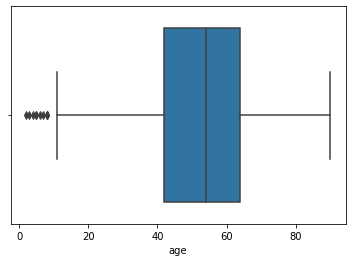

In [47]:
import seaborn as sns
sns.boxplot(x=data['age'])

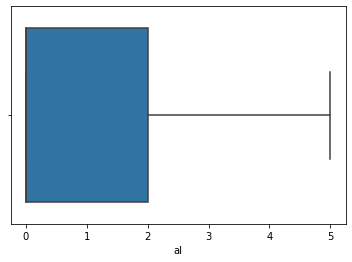

In [48]:
sns.boxplot(x=data['al'])

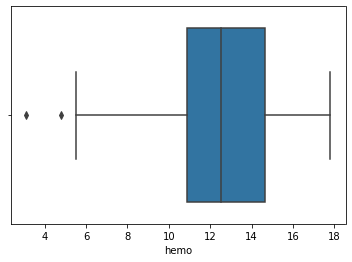

In [49]:
sns.boxplot(x=data['hemo'])

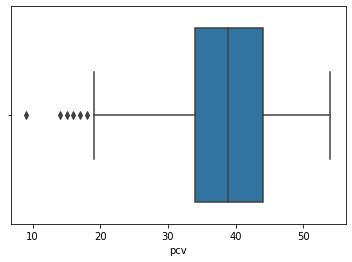

In [50]:
sns.boxplot(x=data['pcv'])

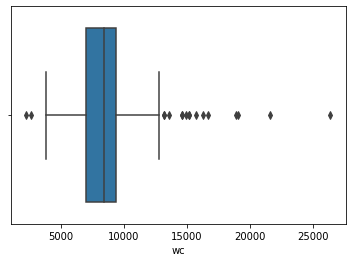

In [51]:
sns.boxplot(x=data['wc'])

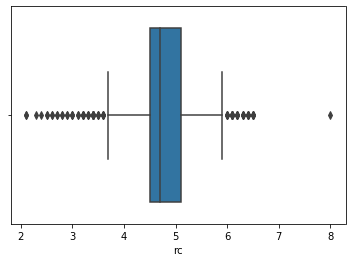

In [52]:
sns.boxplot(x=data['rc'])

In [53]:
Q1= data.quantile(0.25)
Q3= data.quantile(0.75)
IQR= Q3-Q1
IQR

age       22.000000
al         2.000000
sc         2.172454
sod        6.000000
pot        0.800000
hemo       3.750000
pcv       10.000000
wc      2425.000000
rc         0.600000
dtype: float64

In [54]:
data_outlier= data[~((data<(Q1-1.5*IQR))|(data>(Q3 + 1.5*IQR))).any(axis=1)]
data_outlier

,age,al,rbc,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,ane,classification
0,48.0,1.0,normal,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,ckd
2,62.0,2.0,normal,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,yes,ckd
4,51.0,2.0,normal,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,ckd
5,60.0,3.0,normal,1.1,142.000000,3.200000,12.2,39.0,7800.0,4.400000,yes,yes,no,ckd
7,24.0,2.0,normal,1.1,137.528754,4.627244,12.4,44.0,6900.0,5.000000,no,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,43.0,0.0,normal,0.7,141.000000,4.400000,13.0,54.0,7400.0,5.400000,no,no,no,notckd
394,50.0,0.0,normal,0.8,139.000000,5.000000,14.1,45.0,9500.0,4.600000,no,no,no,notckd
395,55.0,0.0,normal,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,no,no,no,notckd
397,12.0,0.0,normal,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,no,no,no,notckd


In [55]:
data_outlier.iloc[:,-1].values

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd',

# Separating Independent and Dependent Variables

In [56]:
x=data_outlier.iloc[:,0:-1].values
x #independent variable

array([[48.0, 1.0, 'normal', ..., 'yes', 'yes', 'no'],
       [62.0, 2.0, 'normal', ..., 'no', 'yes', 'yes'],
       [51.0, 2.0, 'normal', ..., 'no', 'no', 'no'],
       ...,
       [55.0, 0.0, 'normal', ..., 'no', 'no', 'no'],
       [12.0, 0.0, 'normal', ..., 'no', 'no', 'no'],
       [17.0, 0.0, 'normal', ..., 'no', 'no', 'no']], dtype=object)

In [57]:
y=data_outlier.iloc[:,-1].values
y #dependent variable

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd',

# One Hot Encoding

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#rbc column

In [59]:
ct= ColumnTransformer([("oh",OneHotEncoder(),[2])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 48.0, ..., 'yes', 'yes', 'no'],
       [0.0, 1.0, 62.0, ..., 'no', 'yes', 'yes'],
       [0.0, 1.0, 51.0, ..., 'no', 'no', 'no'],
       ...,
       [0.0, 1.0, 55.0, ..., 'no', 'no', 'no'],
       [0.0, 1.0, 12.0, ..., 'no', 'no', 'no'],
       [0.0, 1.0, 17.0, ..., 'no', 'no', 'no']], dtype=object)

In [60]:
x=x[:,1:]
x

array([[1.0, 48.0, 1.0, ..., 'yes', 'yes', 'no'],
       [1.0, 62.0, 2.0, ..., 'no', 'yes', 'yes'],
       [1.0, 51.0, 2.0, ..., 'no', 'no', 'no'],
       ...,
       [1.0, 55.0, 0.0, ..., 'no', 'no', 'no'],
       [1.0, 12.0, 0.0, ..., 'no', 'no', 'no'],
       [1.0, 17.0, 0.0, ..., 'no', 'no', 'no']], dtype=object)

# Label Encoder

In [61]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#htn column

In [62]:
lb=LabelEncoder()
x[:,10]=lb.fit_transform(x[:,10])
x

array([[1.0, 48.0, 1.0, ..., 1, 'yes', 'no'],
       [1.0, 62.0, 2.0, ..., 0, 'yes', 'yes'],
       [1.0, 51.0, 2.0, ..., 0, 'no', 'no'],
       ...,
       [1.0, 55.0, 0.0, ..., 0, 'no', 'no'],
       [1.0, 12.0, 0.0, ..., 0, 'no', 'no'],
       [1.0, 17.0, 0.0, ..., 0, 'no', 'no']], dtype=object)

In [ ]:
#dm

In [63]:
x[:,11]=lb.fit_transform(x[:,11])
x


array([[1.0, 48.0, 1.0, ..., 1, 1, 'no'],
       [1.0, 62.0, 2.0, ..., 0, 1, 'yes'],
       [1.0, 51.0, 2.0, ..., 0, 0, 'no'],
       ...,
       [1.0, 55.0, 0.0, ..., 0, 0, 'no'],
       [1.0, 12.0, 0.0, ..., 0, 0, 'no'],
       [1.0, 17.0, 0.0, ..., 0, 0, 'no']], dtype=object)

In [ ]:
#ane col

In [64]:
x[:,12]=lb.fit_transform(x[:,12])
x

array([[1.0, 48.0, 1.0, ..., 1, 1, 0],
       [1.0, 62.0, 2.0, ..., 0, 1, 1],
       [1.0, 51.0, 2.0, ..., 0, 0, 0],
       ...,
       [1.0, 55.0, 0.0, ..., 0, 0, 0],
       [1.0, 12.0, 0.0, ..., 0, 0, 0],
       [1.0, 17.0, 0.0, ..., 0, 0, 0]], dtype=object)

In [65]:
y=lb.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Split into train and test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
x_train.shape

(220, 13)

In [69]:
x_test.shape

(56, 13)

# Model Building

In [70]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier(n_estimators=13,random_state=0)

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
from joblib import dump
dump(rf,"randomforest1.save")

['randomforest1.save']

In [73]:
y_pred=rf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9464285714285714

In [75]:
rf.predict([[1.0, 42.0, 0.0, 0.9, 128.0, 4.4, 14.2, 47.0, 6600.0, 4.3, 0, 0, 0]])

array([1])

# Saving the Model

In [76]:
from joblib import dump
dump(rf,"randomforest1.save")

['randomforest1.save']

# Data Visualization

In [77]:
rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [78]:
len(rf.estimators_)

13

[Text(664.9499999999999, 647.79, 'X[6] <= 13.05\ngini = 0.483\nsamples = 143\nvalue = [130, 90]'),
 Text(362.7, 530.01, 'X[8] <= 8353.061\ngini = 0.049\nsamples = 75\nvalue = [116, 3]'),
 Text(241.79999999999998, 412.22999999999996, 'X[9] <= 5.1\ngini = 0.255\nsamples = 15\nvalue = [17, 3]'),
 Text(120.89999999999999, 294.45, 'gini = 0.0\nsamples = 13\nvalue = [17, 0]'),
 Text(362.7, 294.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(483.59999999999997, 412.22999999999996, 'gini = 0.0\nsamples = 60\nvalue = [99, 0]'),
 Text(967.1999999999999, 530.01, 'X[3] <= 1.25\ngini = 0.239\nsamples = 68\nvalue = [14, 87]'),
 Text(725.4, 412.22999999999996, 'X[2] <= 0.5\ngini = 0.139\nsamples = 63\nvalue = [7, 86]'),
 Text(604.5, 294.45, 'X[1] <= 60.5\ngini = 0.065\nsamples = 61\nvalue = [3, 86]'),
 Text(483.59999999999997, 176.66999999999996, 'gini = 0.0\nsamples = 42\nvalue = [0, 62]'),
 Text(725.4, 176.66999999999996, 'X[11] <= 0.5\ngini = 0.198\nsamples = 19\nvalue = [3, 24]'),
 Text(604

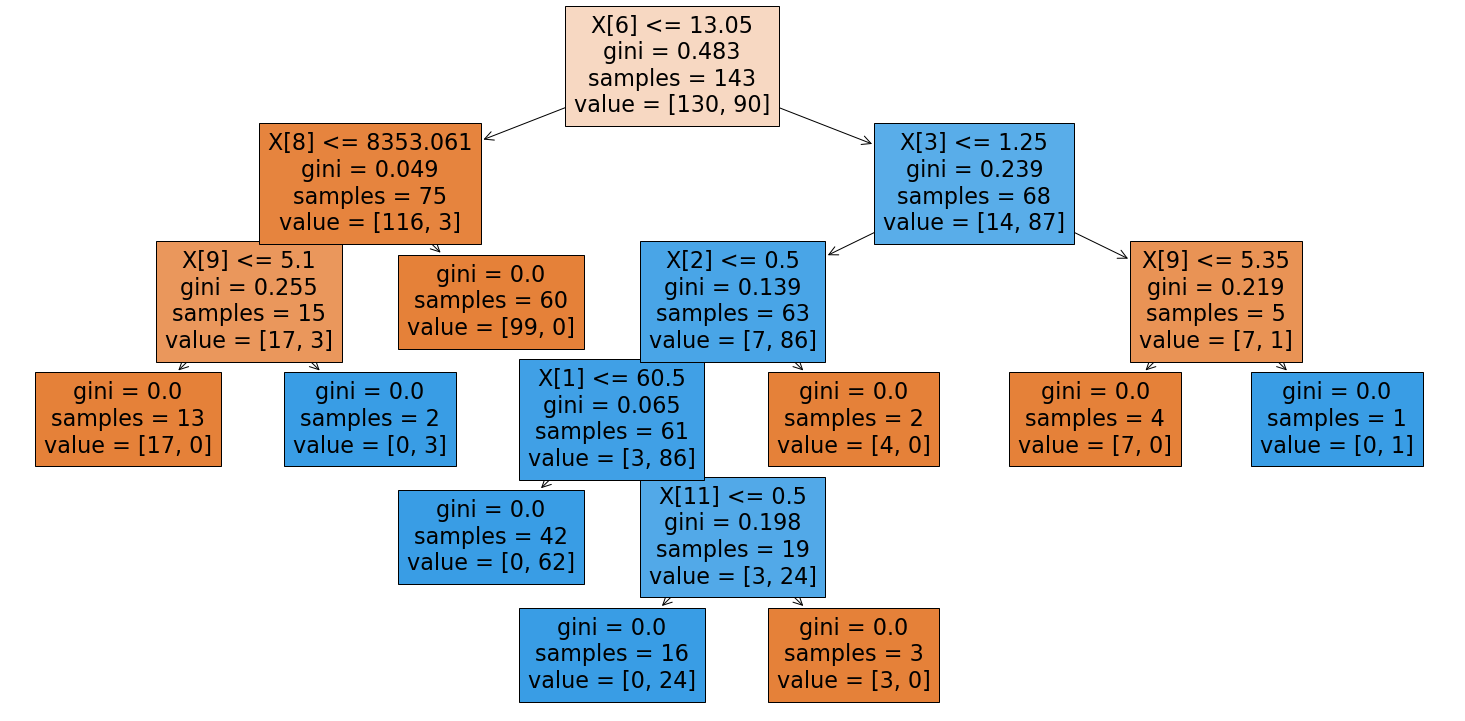

In [79]:
plt.figure(figsize=(26,13))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(870.48, 1342.692, 'X[6] <= 12.95\ngini = 0.483\nsamples = 141\nvalue = [130, 90]'),
 Text(677.04, 1201.356, 'X[4] <= 146.0\ngini = 0.046\nsamples = 74\nvalue = [124, 3]'),
 Text(580.3199999999999, 1060.02, 'X[2] <= 0.5\ngini = 0.016\nsamples = 73\nvalue = [124, 1]'),
 Text(483.6, 918.684, 'X[12] <= 0.5\ngini = 0.044\nsamples = 25\nvalue = [43, 1]'),
 Text(386.88, 777.348, 'X[7] <= 37.942\ngini = 0.059\nsamples = 20\nvalue = [32, 1]'),
 Text(290.15999999999997, 636.012, 'gini = 0.0\nsamples = 10\nvalue = [18, 0]'),
 Text(483.6, 636.012, 'X[10] <= 0.5\ngini = 0.124\nsamples = 10\nvalue = [14, 1]'),
 Text(386.88, 494.67600000000004, 'X[11] <= 0.5\ngini = 0.198\nsamples = 6\nvalue = [8, 1]'),
 Text(290.15999999999997, 353.3399999999999, 'X[5] <= 4.364\ngini = 0.219\nsamples = 5\nvalue = [7, 1]'),
 Text(193.44, 212.00400000000013, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(96.72, 70.66800000000012, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(290.159999999999

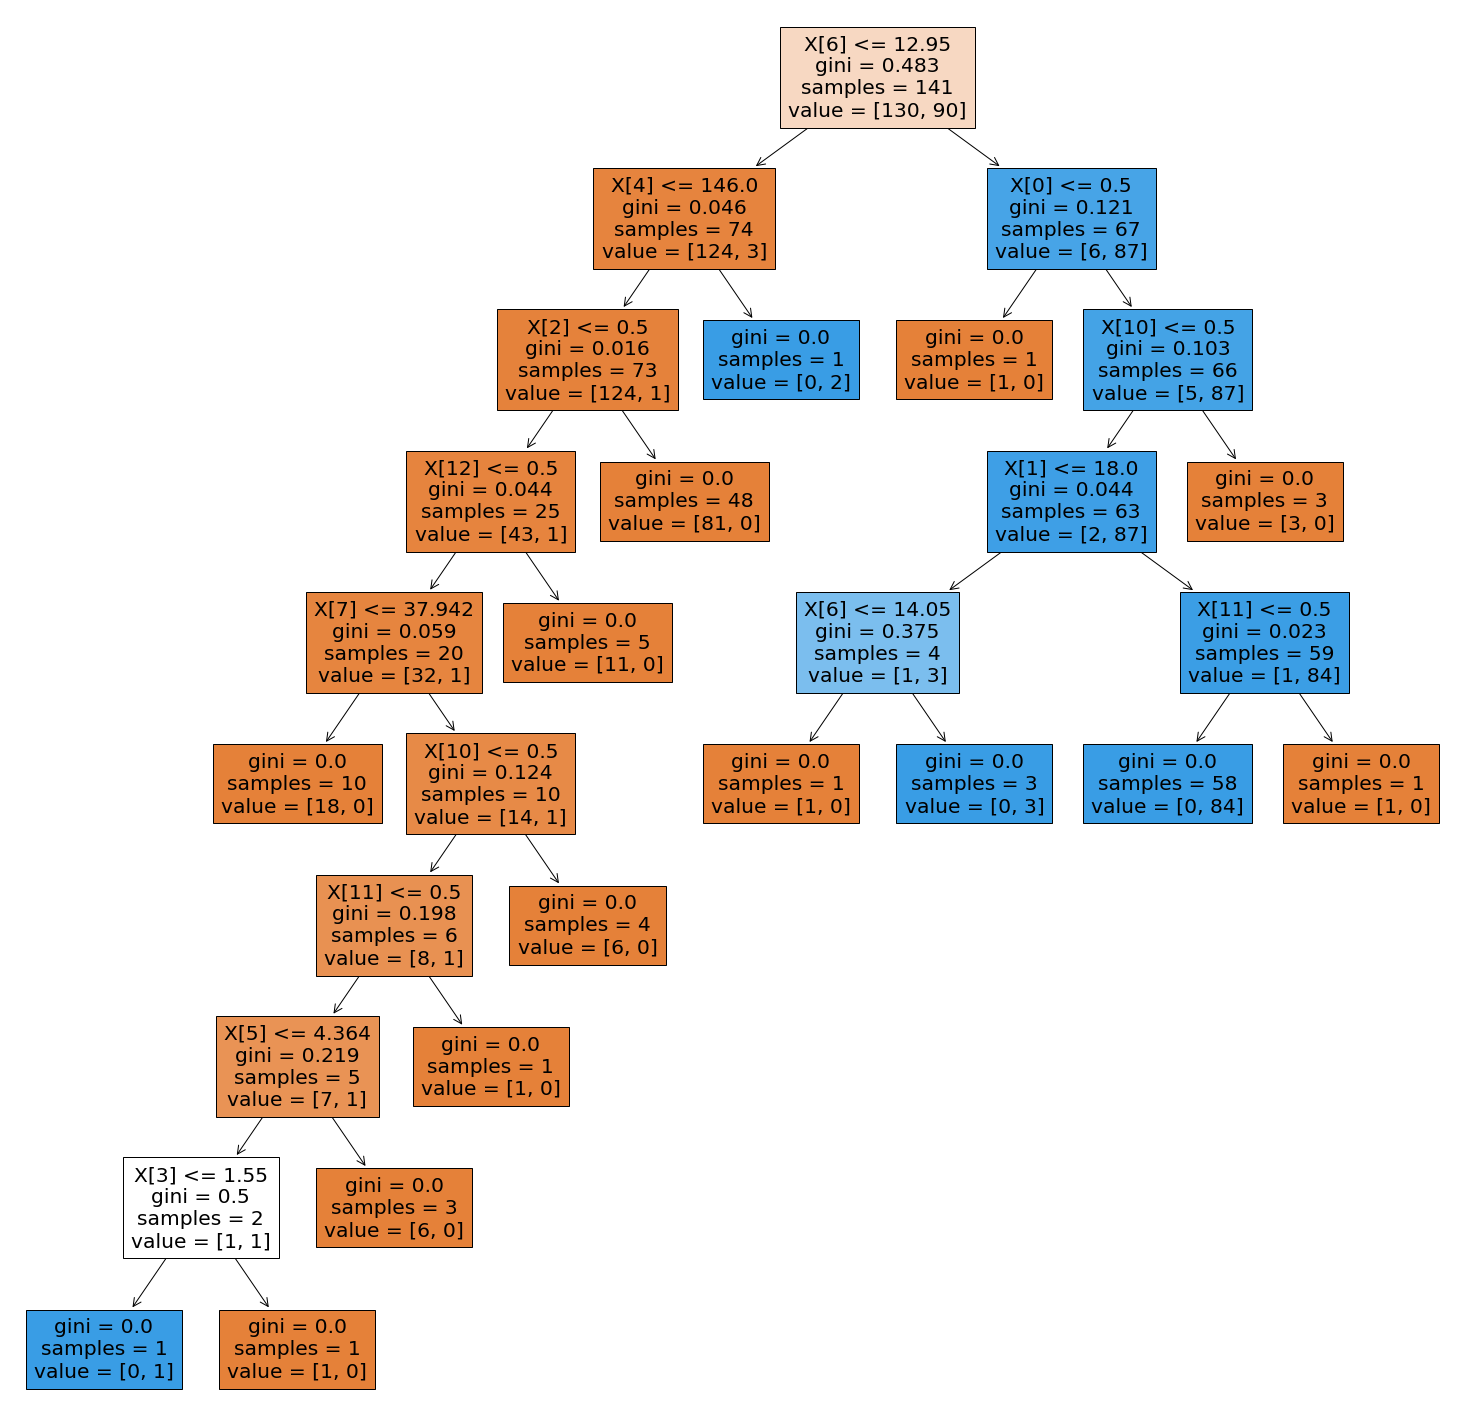

In [80]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[1],filled=True)

[Text(725.4, 1312.405714285714, 'X[6] <= 13.15\ngini = 0.485\nsamples = 146\nvalue = [129, 91]'),
 Text(446.4, 1110.4971428571428, 'X[3] <= 0.85\ngini = 0.048\nsamples = 80\nvalue = [119, 3]'),
 Text(334.79999999999995, 908.5885714285714, 'X[4] <= 139.5\ngini = 0.42\nsamples = 7\nvalue = [7, 3]'),
 Text(223.2, 706.68, 'X[3] <= 0.75\ngini = 0.219\nsamples = 5\nvalue = [7, 1]'),
 Text(111.6, 504.7714285714286, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(334.79999999999995, 504.7714285714286, 'X[7] <= 41.5\ngini = 0.32\nsamples = 3\nvalue = [4, 1]'),
 Text(223.2, 302.86285714285714, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(446.4, 302.86285714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(446.4, 706.68, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(558.0, 908.5885714285714, 'gini = 0.0\nsamples = 73\nvalue = [112, 0]'),
 Text(1004.4, 1110.4971428571428, 'X[7] <= 44.5\ngini = 0.183\nsamples = 66\nvalue = [10, 88]'),
 Text(781.1999999999999, 908.5885714285714, '

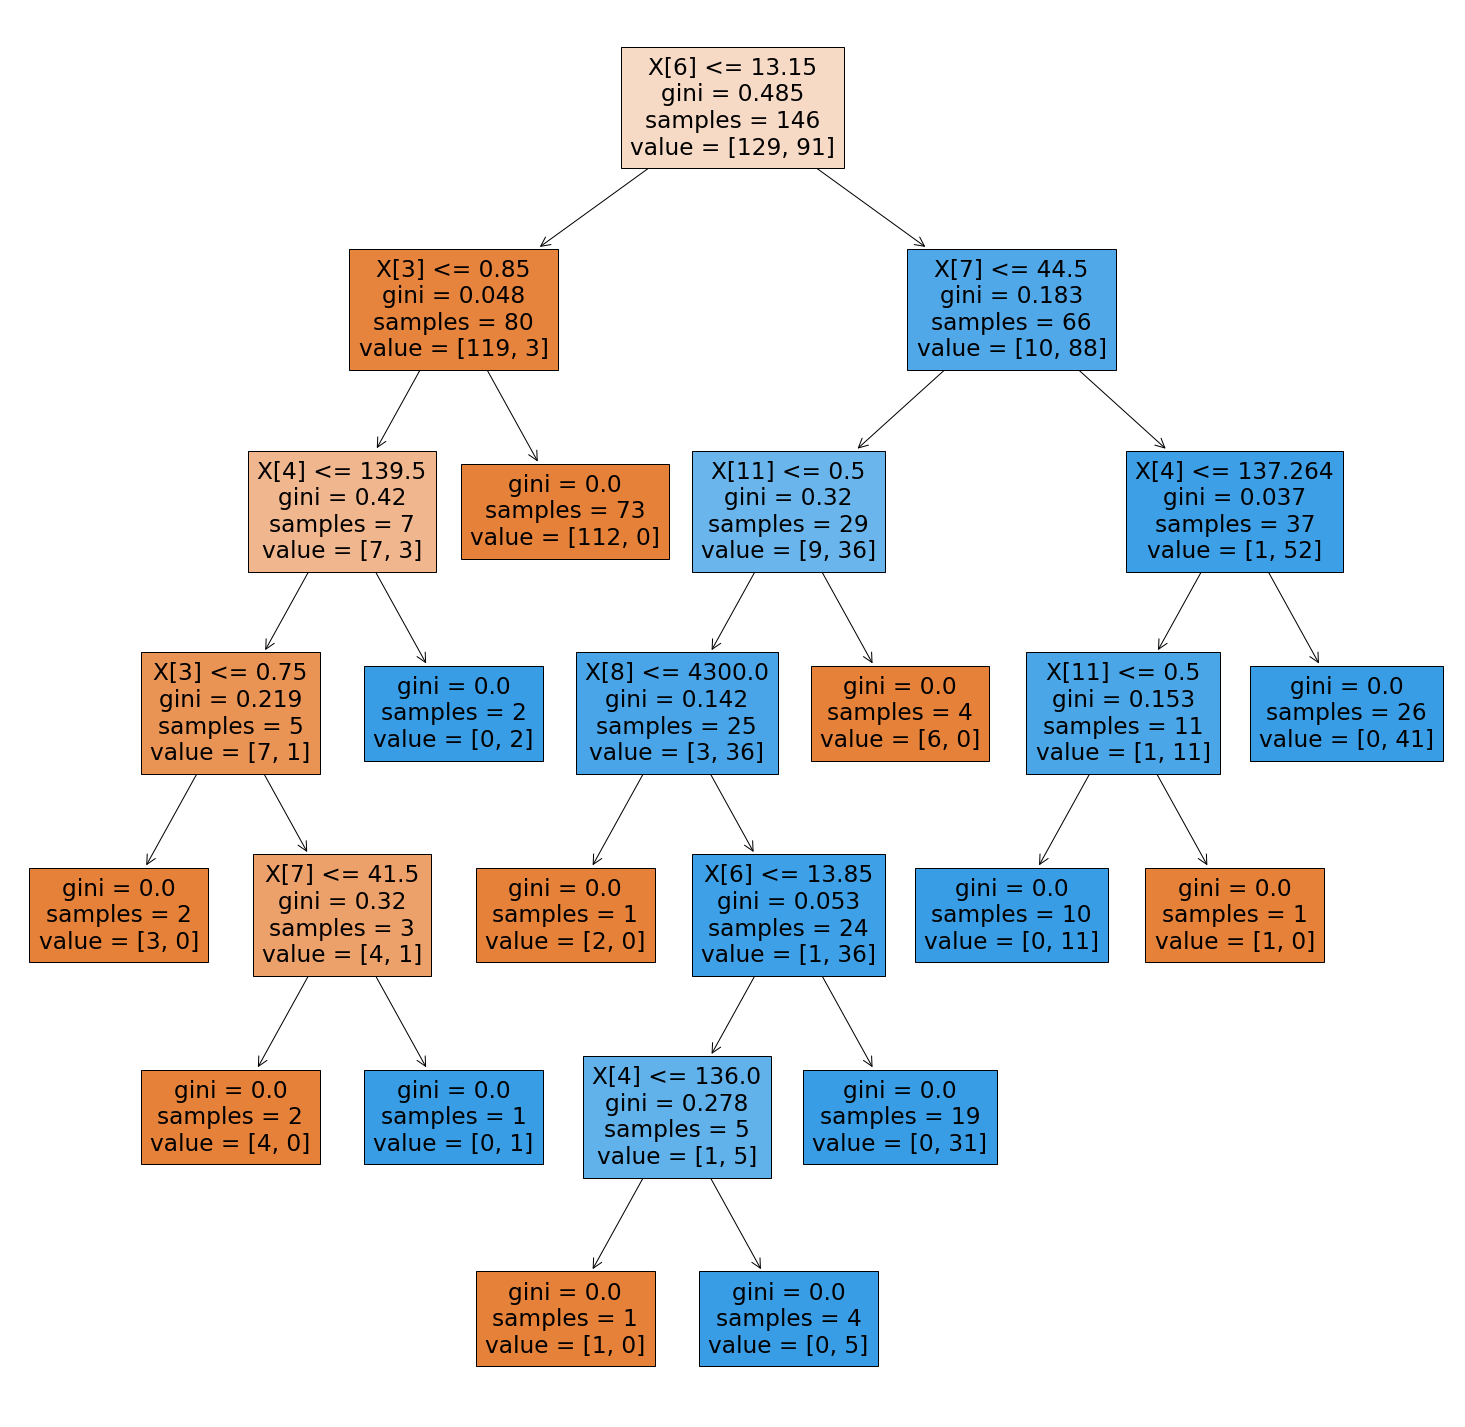

In [81]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[2],filled=True)

[Text(870.4799999999999, 1325.0249999999999, 'X[6] <= 12.9\ngini = 0.489\nsamples = 139\nvalue = [126, 94]'),
 Text(580.3199999999999, 1148.355, 'X[2] <= 0.5\ngini = 0.034\nsamples = 68\nvalue = [113, 2]'),
 Text(435.23999999999995, 971.685, 'X[10] <= 0.5\ngini = 0.083\nsamples = 29\nvalue = [44, 2]'),
 Text(290.15999999999997, 795.015, 'X[9] <= 4.554\ngini = 0.172\nsamples = 14\nvalue = [19, 2]'),
 Text(145.07999999999998, 618.3449999999999, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Text(435.23999999999995, 618.3449999999999, 'X[11] <= 0.5\ngini = 0.208\nsamples = 11\nvalue = [15, 2]'),
 Text(290.15999999999997, 441.67499999999995, 'X[4] <= 139.5\ngini = 0.26\nsamples = 9\nvalue = [11, 2]'),
 Text(145.07999999999998, 265.0049999999999, 'gini = 0.0\nsamples = 6\nvalue = [10, 0]'),
 Text(435.23999999999995, 265.0049999999999, 'X[3] <= 1.05\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(290.15999999999997, 88.33500000000004, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(580.3

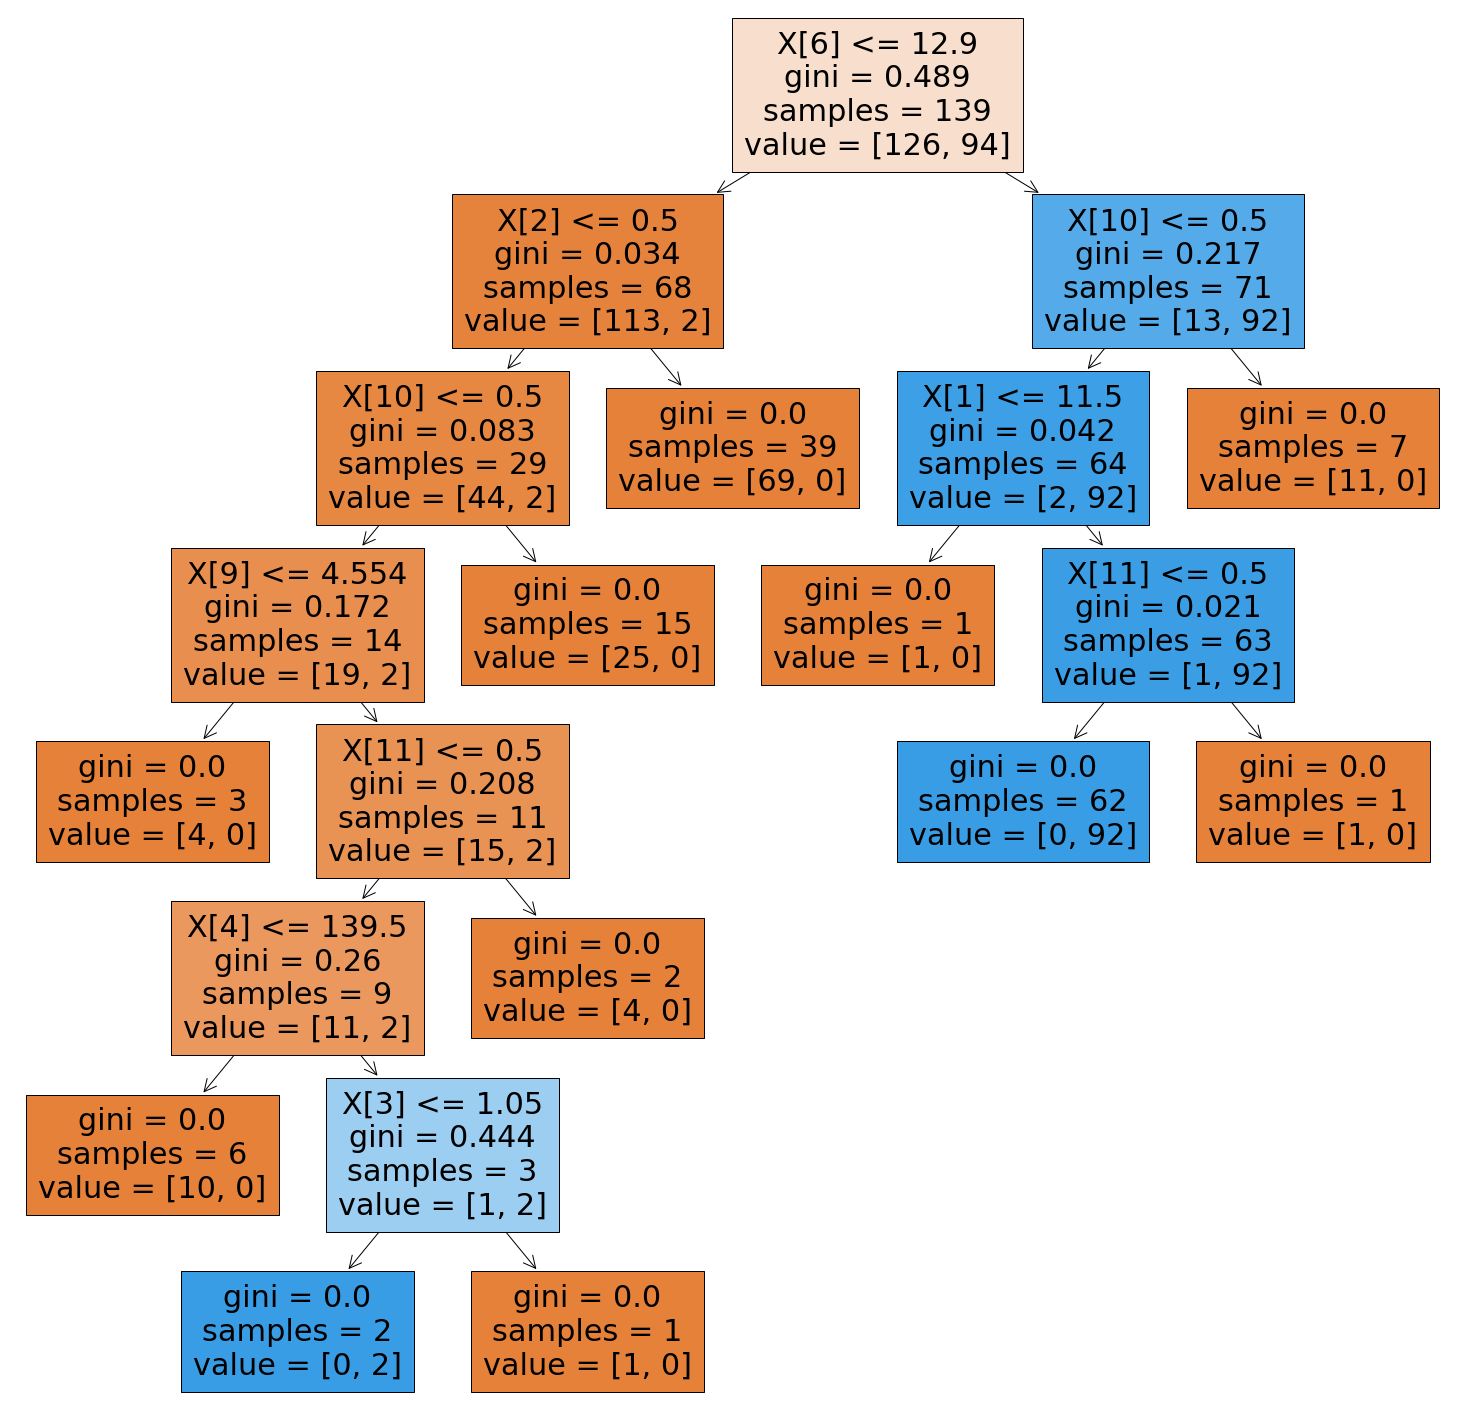

In [82]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[3],filled=True)

[Text(880.842857142857, 1295.58, 'X[6] <= 13.05\ngini = 0.476\nsamples = 139\nvalue = [134, 86]'),
 Text(518.1428571428571, 1060.02, 'X[6] <= 12.95\ngini = 0.046\nsamples = 80\nvalue = [123, 3]'),
 Text(310.88571428571424, 824.4599999999999, 'X[5] <= 4.15\ngini = 0.017\nsamples = 76\nvalue = [119, 1]'),
 Text(207.25714285714284, 588.9, 'X[3] <= 0.95\ngini = 0.056\nsamples = 22\nvalue = [34, 1]'),
 Text(103.62857142857142, 353.3399999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(310.88571428571424, 353.3399999999999, 'gini = 0.0\nsamples = 21\nvalue = [34, 0]'),
 Text(414.5142857142857, 588.9, 'gini = 0.0\nsamples = 54\nvalue = [85, 0]'),
 Text(725.4, 824.4599999999999, 'X[2] <= 1.0\ngini = 0.444\nsamples = 4\nvalue = [4, 2]'),
 Text(621.7714285714285, 588.9, 'X[5] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [2, 2]'),
 Text(518.1428571428571, 353.3399999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(725.4, 353.3399999999999, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]')

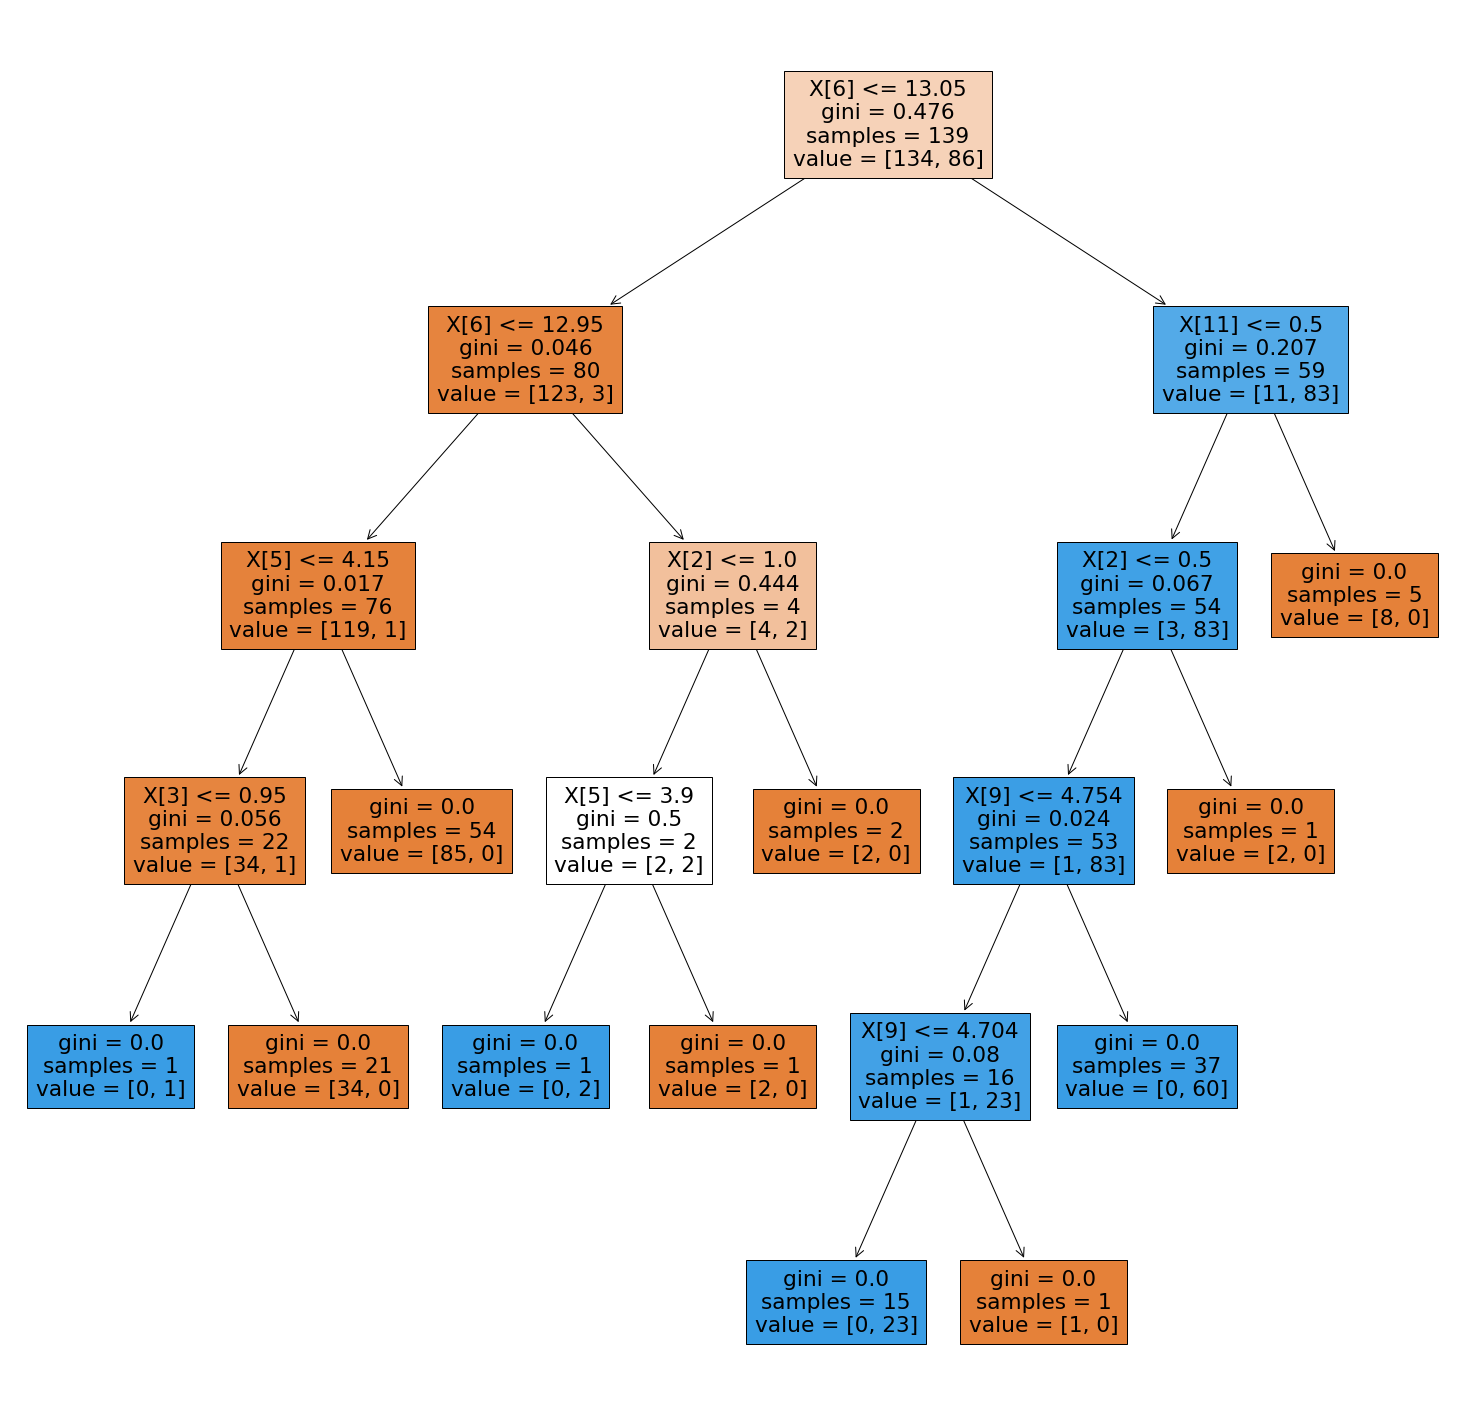

In [83]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[4],filled=True)

[Text(799.5886363636363, 1295.58, 'X[9] <= 4.754\ngini = 0.476\nsamples = 139\nvalue = [134, 86]'),
 Text(412.1590909090909, 1060.02, 'X[5] <= 3.6\ngini = 0.226\nsamples = 91\nvalue = [127, 19]'),
 Text(131.89090909090908, 824.4599999999999, 'X[7] <= 37.5\ngini = 0.49\nsamples = 9\nvalue = [6, 8]'),
 Text(65.94545454545454, 588.9, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]'),
 Text(197.83636363636361, 588.9, 'X[2] <= 1.5\ngini = 0.198\nsamples = 6\nvalue = [1, 8]'),
 Text(131.89090909090908, 353.3399999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 8]'),
 Text(263.78181818181815, 353.3399999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(692.4272727272727, 824.4599999999999, 'X[3] <= 0.95\ngini = 0.153\nsamples = 82\nvalue = [121, 11]'),
 Text(527.5636363636363, 588.9, 'X[1] <= 46.5\ngini = 0.498\nsamples = 12\nvalue = [8, 9]'),
 Text(395.67272727272723, 353.3399999999999, 'X[9] <= 4.704\ngini = 0.42\nsamples = 8\nvalue = [7, 3]'),
 Text(329.7272727272727, 117.77999999999997, 'g

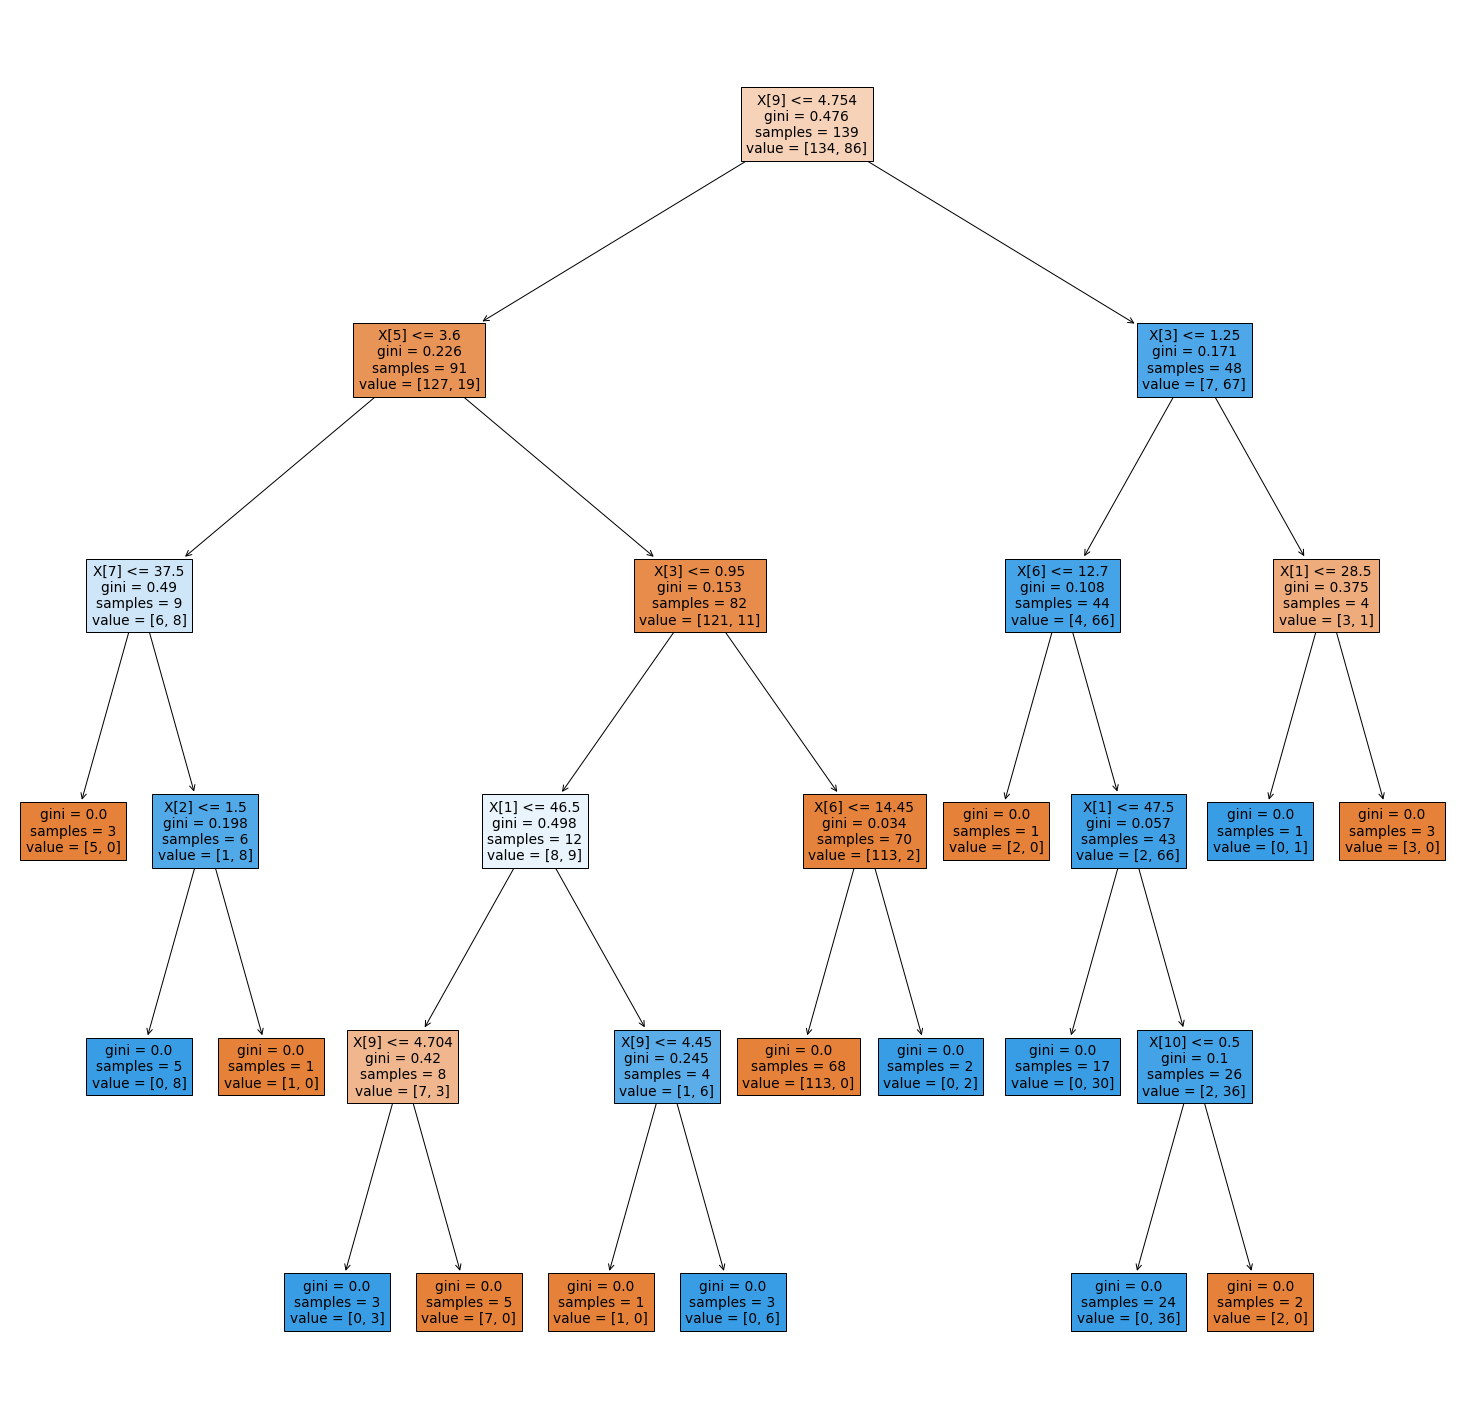

In [84]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[5],filled=True)

[Text(785.8499999999999, 1295.58, 'X[3] <= 1.15\ngini = 0.488\nsamples = 141\nvalue = [127, 93]'),
 Text(483.59999999999997, 1060.02, 'X[6] <= 12.763\ngini = 0.264\nsamples = 64\nvalue = [15, 81]'),
 Text(241.79999999999998, 824.4599999999999, 'X[4] <= 145.5\ngini = 0.133\nsamples = 11\nvalue = [13, 1]'),
 Text(120.89999999999999, 588.9, 'gini = 0.0\nsamples = 10\nvalue = [13, 0]'),
 Text(362.7, 588.9, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(725.4, 824.4599999999999, 'X[4] <= 137.764\ngini = 0.048\nsamples = 53\nvalue = [2, 80]'),
 Text(604.5, 588.9, 'X[8] <= 4950.0\ngini = 0.159\nsamples = 17\nvalue = [2, 21]'),
 Text(483.59999999999997, 353.3399999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(725.4, 353.3399999999999, 'X[11] <= 0.5\ngini = 0.087\nsamples = 16\nvalue = [1, 21]'),
 Text(604.5, 117.77999999999997, 'gini = 0.0\nsamples = 15\nvalue = [0, 21]'),
 Text(846.3, 117.77999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(846.3, 588.9, 'gini = 0.

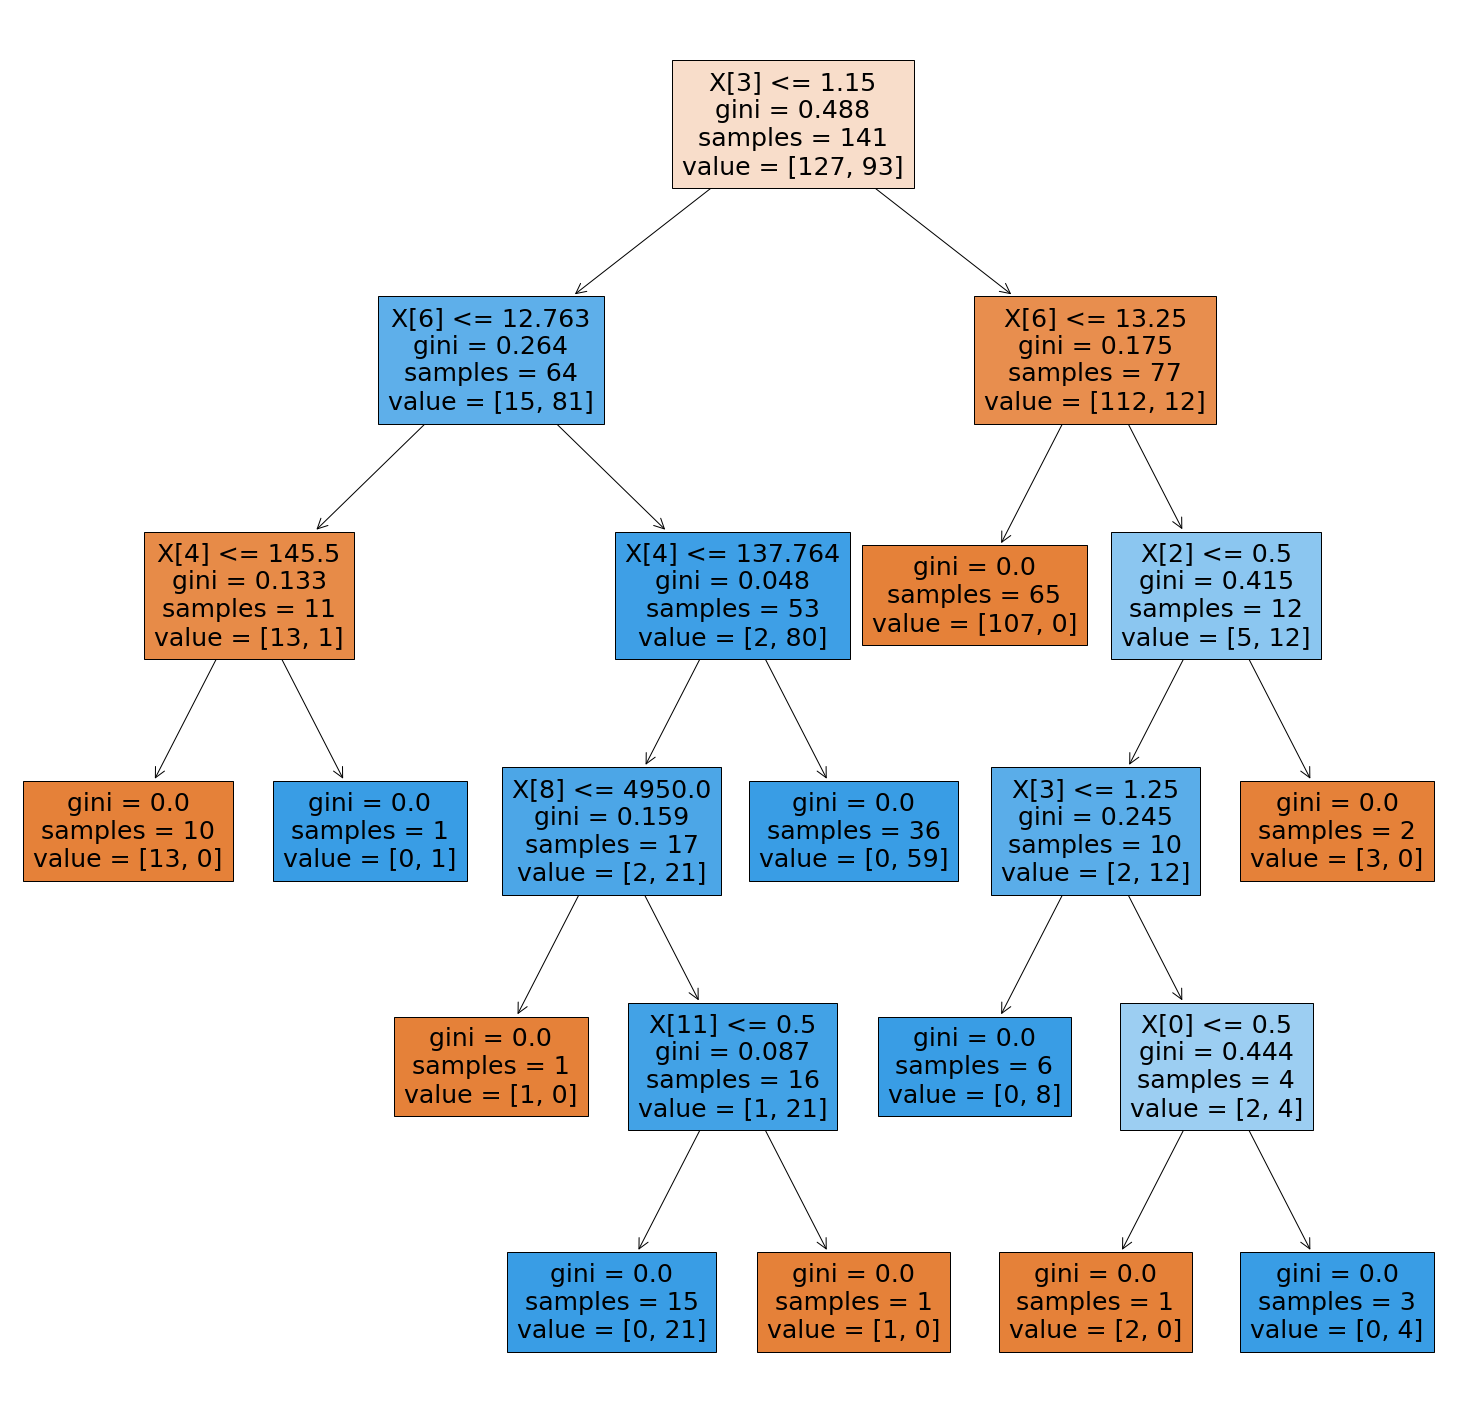

In [85]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[6],filled=True)

[Text(806.0, 1334.84, 'X[11] <= 0.5\ngini = 0.485\nsamples = 151\nvalue = [129, 91]'),
 Text(644.8, 1177.8, 'X[7] <= 39.5\ngini = 0.477\nsamples = 103\nvalue = [59, 91]'),
 Text(322.4, 1020.76, 'X[6] <= 12.513\ngini = 0.037\nsamples = 37\nvalue = [52, 1]'),
 Text(161.2, 863.7199999999999, 'gini = 0.0\nsamples = 23\nvalue = [36, 0]'),
 Text(483.59999999999997, 863.7199999999999, 'X[3] <= 1.0\ngini = 0.111\nsamples = 14\nvalue = [16, 1]'),
 Text(322.4, 706.68, 'X[1] <= 46.5\ngini = 0.32\nsamples = 4\nvalue = [4, 1]'),
 Text(161.2, 549.64, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Text(483.59999999999997, 549.64, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(644.8, 706.68, 'gini = 0.0\nsamples = 10\nvalue = [12, 0]'),
 Text(967.1999999999999, 1020.76, 'X[9] <= 4.35\ngini = 0.134\nsamples = 66\nvalue = [7, 90]'),
 Text(806.0, 863.7199999999999, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(1128.3999999999999, 863.7199999999999, 'X[2] <= 0.5\ngini = 0.081\nsamples = 64\nvalue = [

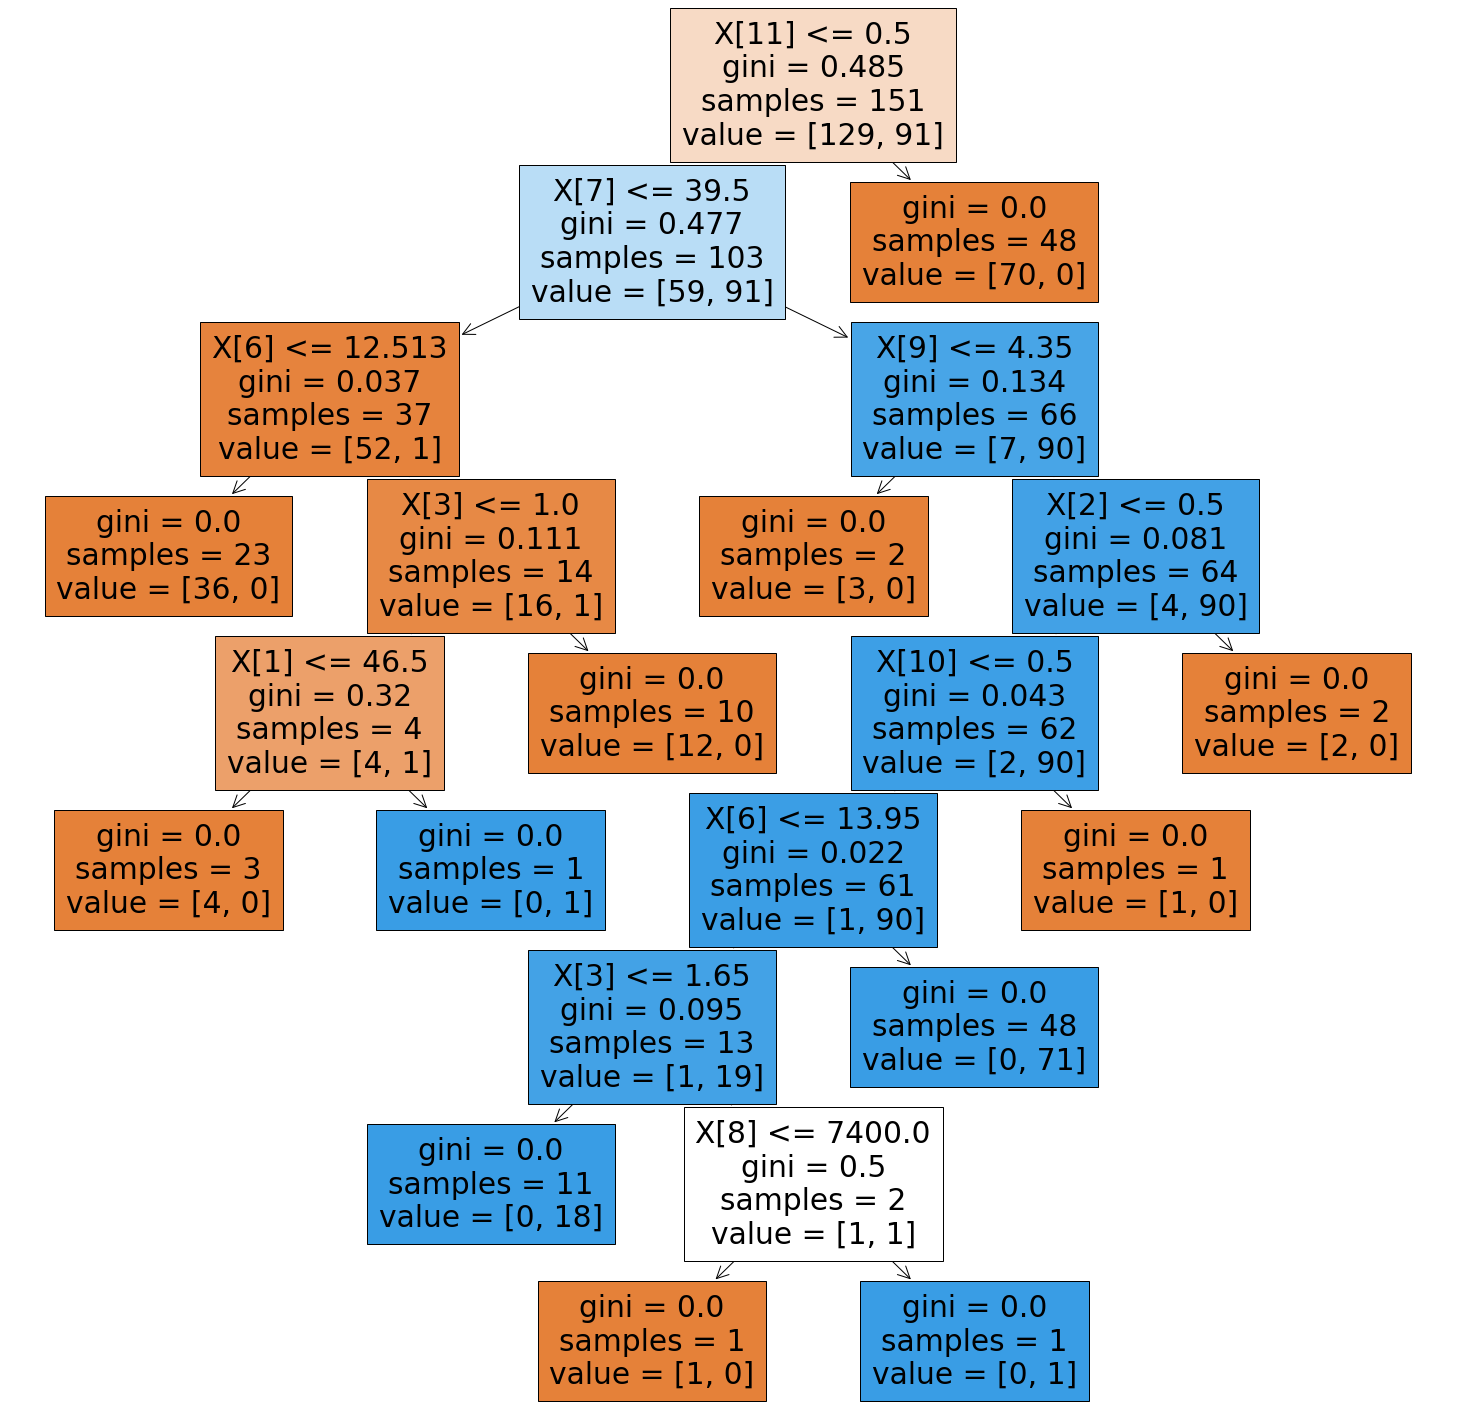

In [86]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[7],filled=True)

[Text(791.3454545454545, 1295.58, 'X[4] <= 139.5\ngini = 0.492\nsamples = 137\nvalue = [124, 96]'),
 Text(395.67272727272723, 1060.02, 'X[7] <= 44.5\ngini = 0.347\nsamples = 88\nvalue = [111, 32]'),
 Text(263.78181818181815, 824.4599999999999, 'X[9] <= 4.754\ngini = 0.152\nsamples = 76\nvalue = [111, 10]'),
 Text(131.89090909090908, 588.9, 'gini = 0.0\nsamples = 64\nvalue = [102, 0]'),
 Text(395.67272727272723, 588.9, 'X[2] <= 0.5\ngini = 0.499\nsamples = 12\nvalue = [9, 10]'),
 Text(263.78181818181815, 353.3399999999999, 'X[1] <= 67.0\ngini = 0.165\nsamples = 7\nvalue = [1, 10]'),
 Text(131.89090909090908, 117.77999999999997, 'gini = 0.0\nsamples = 6\nvalue = [0, 10]'),
 Text(395.67272727272723, 117.77999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(527.5636363636363, 353.3399999999999, 'gini = 0.0\nsamples = 5\nvalue = [8, 0]'),
 Text(527.5636363636363, 824.4599999999999, 'gini = 0.0\nsamples = 12\nvalue = [0, 22]'),
 Text(1187.0181818181818, 1060.02, 'X[2] <= 0.5\ngin

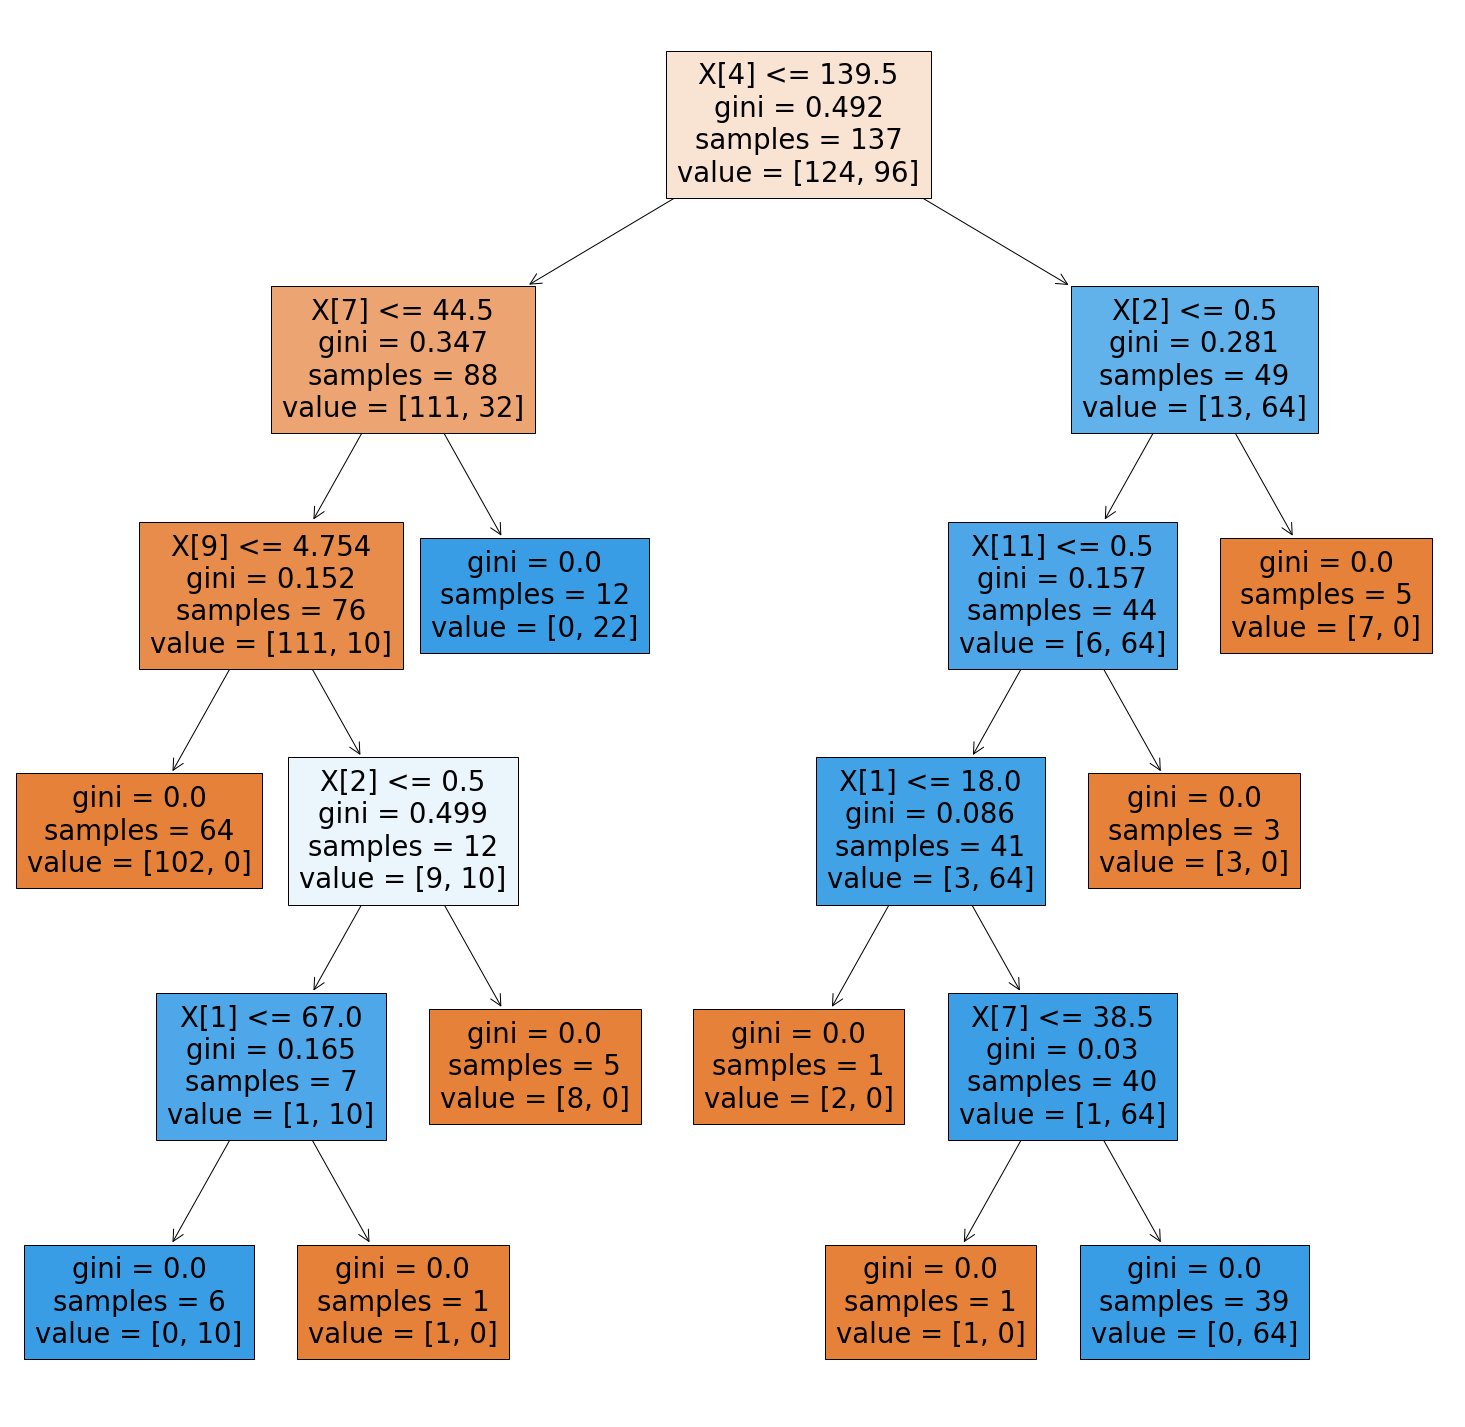

In [87]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[8],filled=True)

[Text(774.8590909090908, 1334.84, 'X[4] <= 138.5\ngini = 0.487\nsamples = 140\nvalue = [128, 92]'),
 Text(428.6454545454545, 1177.8, 'X[8] <= 8353.061\ngini = 0.402\nsamples = 90\nvalue = [106, 41]'),
 Text(197.83636363636361, 1020.76, 'X[2] <= 0.5\ngini = 0.487\nsamples = 31\nvalue = [23, 32]'),
 Text(131.89090909090908, 863.7199999999999, 'X[6] <= 12.7\ngini = 0.381\nsamples = 22\nvalue = [11, 32]'),
 Text(65.94545454545454, 706.68, 'gini = 0.0\nsamples = 4\nvalue = [8, 0]'),
 Text(197.83636363636361, 706.68, 'X[11] <= 0.5\ngini = 0.157\nsamples = 18\nvalue = [3, 32]'),
 Text(131.89090909090908, 549.64, 'X[3] <= 1.25\ngini = 0.111\nsamples = 17\nvalue = [2, 32]'),
 Text(65.94545454545454, 392.5999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 29]'),
 Text(197.83636363636361, 392.5999999999999, 'X[0] <= 0.5\ngini = 0.48\nsamples = 3\nvalue = [2, 3]'),
 Text(131.89090909090908, 235.55999999999995, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(263.78181818181815, 235.559999999999

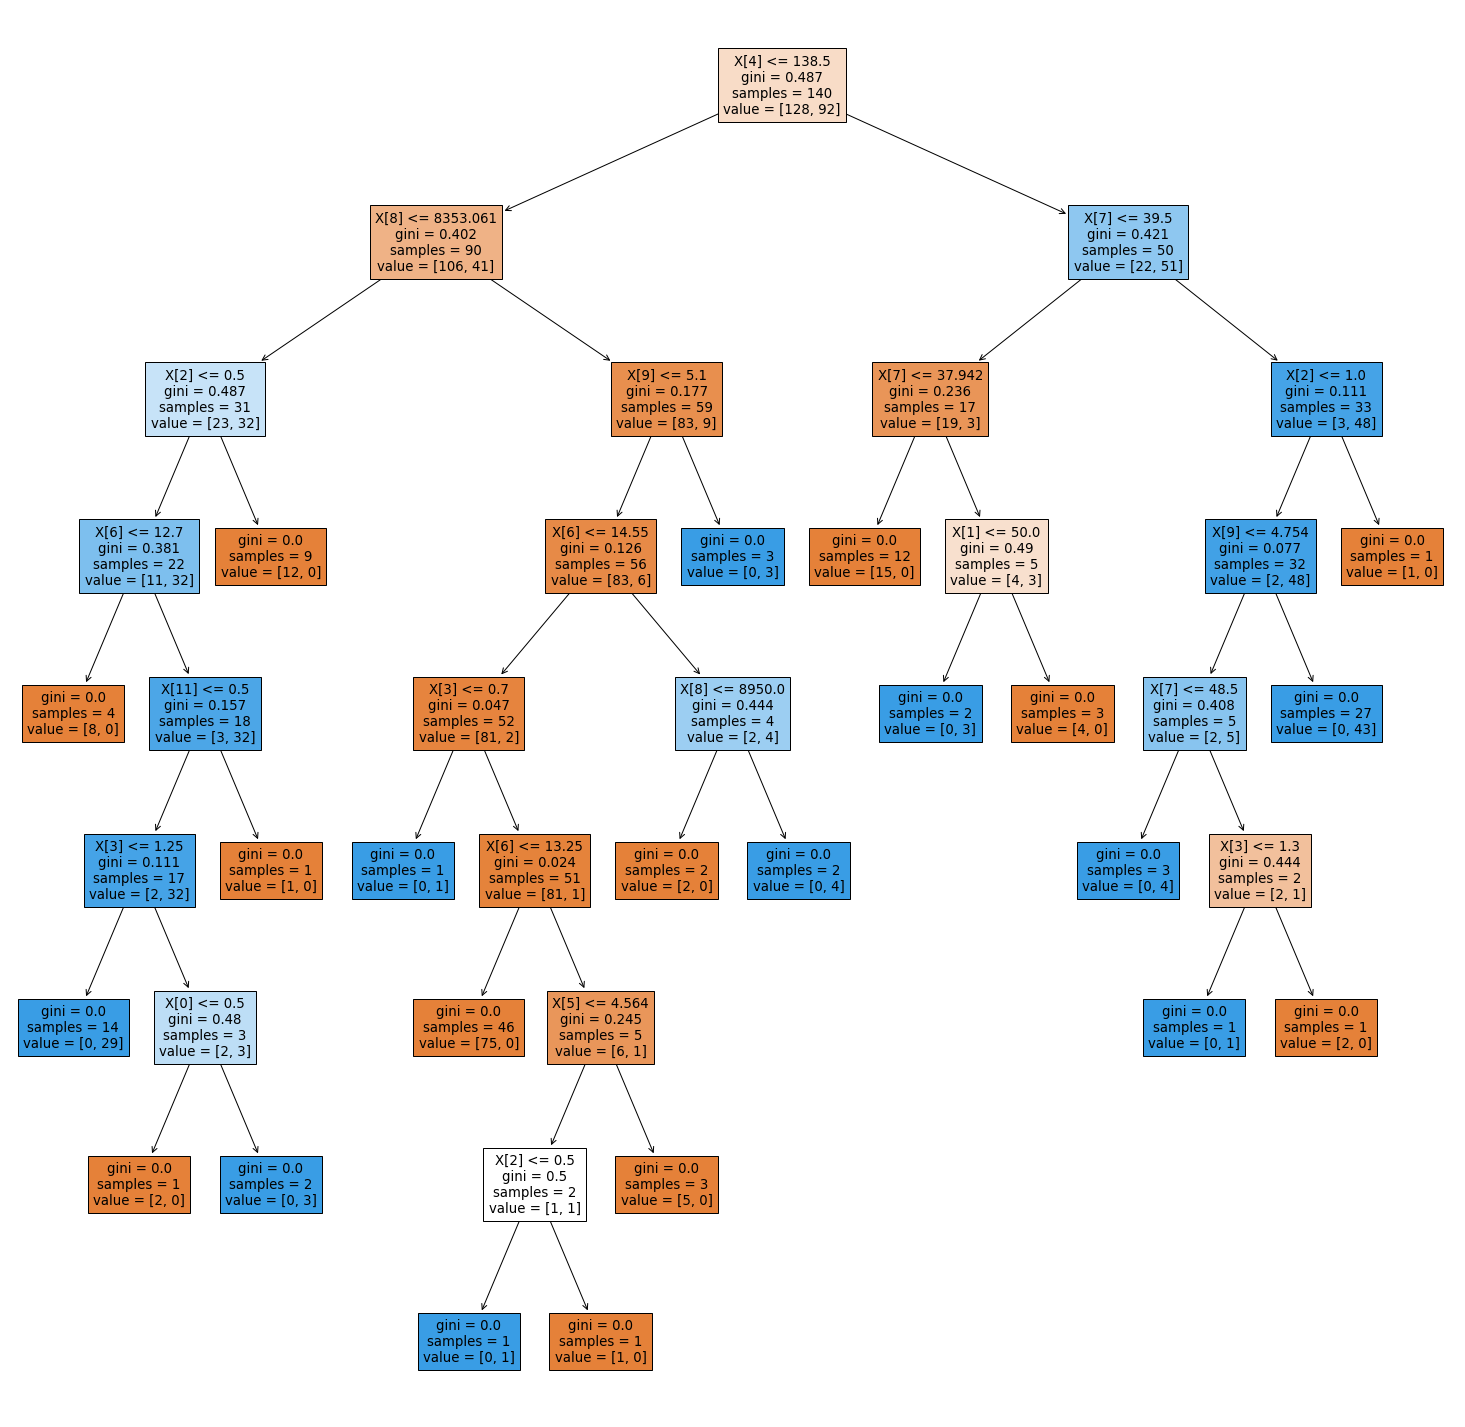

In [88]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[9],filled=True)

[Text(725.4, 1312.405714285714, 'X[7] <= 39.5\ngini = 0.47\nsamples = 141\nvalue = [137, 83]'),
 Text(362.7, 1110.4971428571428, 'X[4] <= 146.0\ngini = 0.052\nsamples = 69\nvalue = [110, 3]'),
 Text(181.35, 908.5885714285714, 'gini = 0.0\nsamples = 68\nvalue = [110, 0]'),
 Text(544.05, 908.5885714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]'),
 Text(1088.1, 1110.4971428571428, 'X[10] <= 0.5\ngini = 0.377\nsamples = 72\nvalue = [27, 80]'),
 Text(906.75, 908.5885714285714, 'X[2] <= 1.0\ngini = 0.148\nsamples = 61\nvalue = [7, 80]'),
 Text(725.4, 706.68, 'X[11] <= 0.5\ngini = 0.111\nsamples = 60\nvalue = [5, 80]'),
 Text(544.05, 504.7714285714286, 'X[12] <= 0.5\ngini = 0.07\nsamples = 59\nvalue = [3, 80]'),
 Text(362.7, 302.86285714285714, 'X[1] <= 18.5\ngini = 0.024\nsamples = 58\nvalue = [1, 80]'),
 Text(181.35, 100.95428571428579, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(544.05, 100.95428571428579, 'gini = 0.0\nsamples = 57\nvalue = [0, 80]'),
 Text(725.4, 302.862857142857

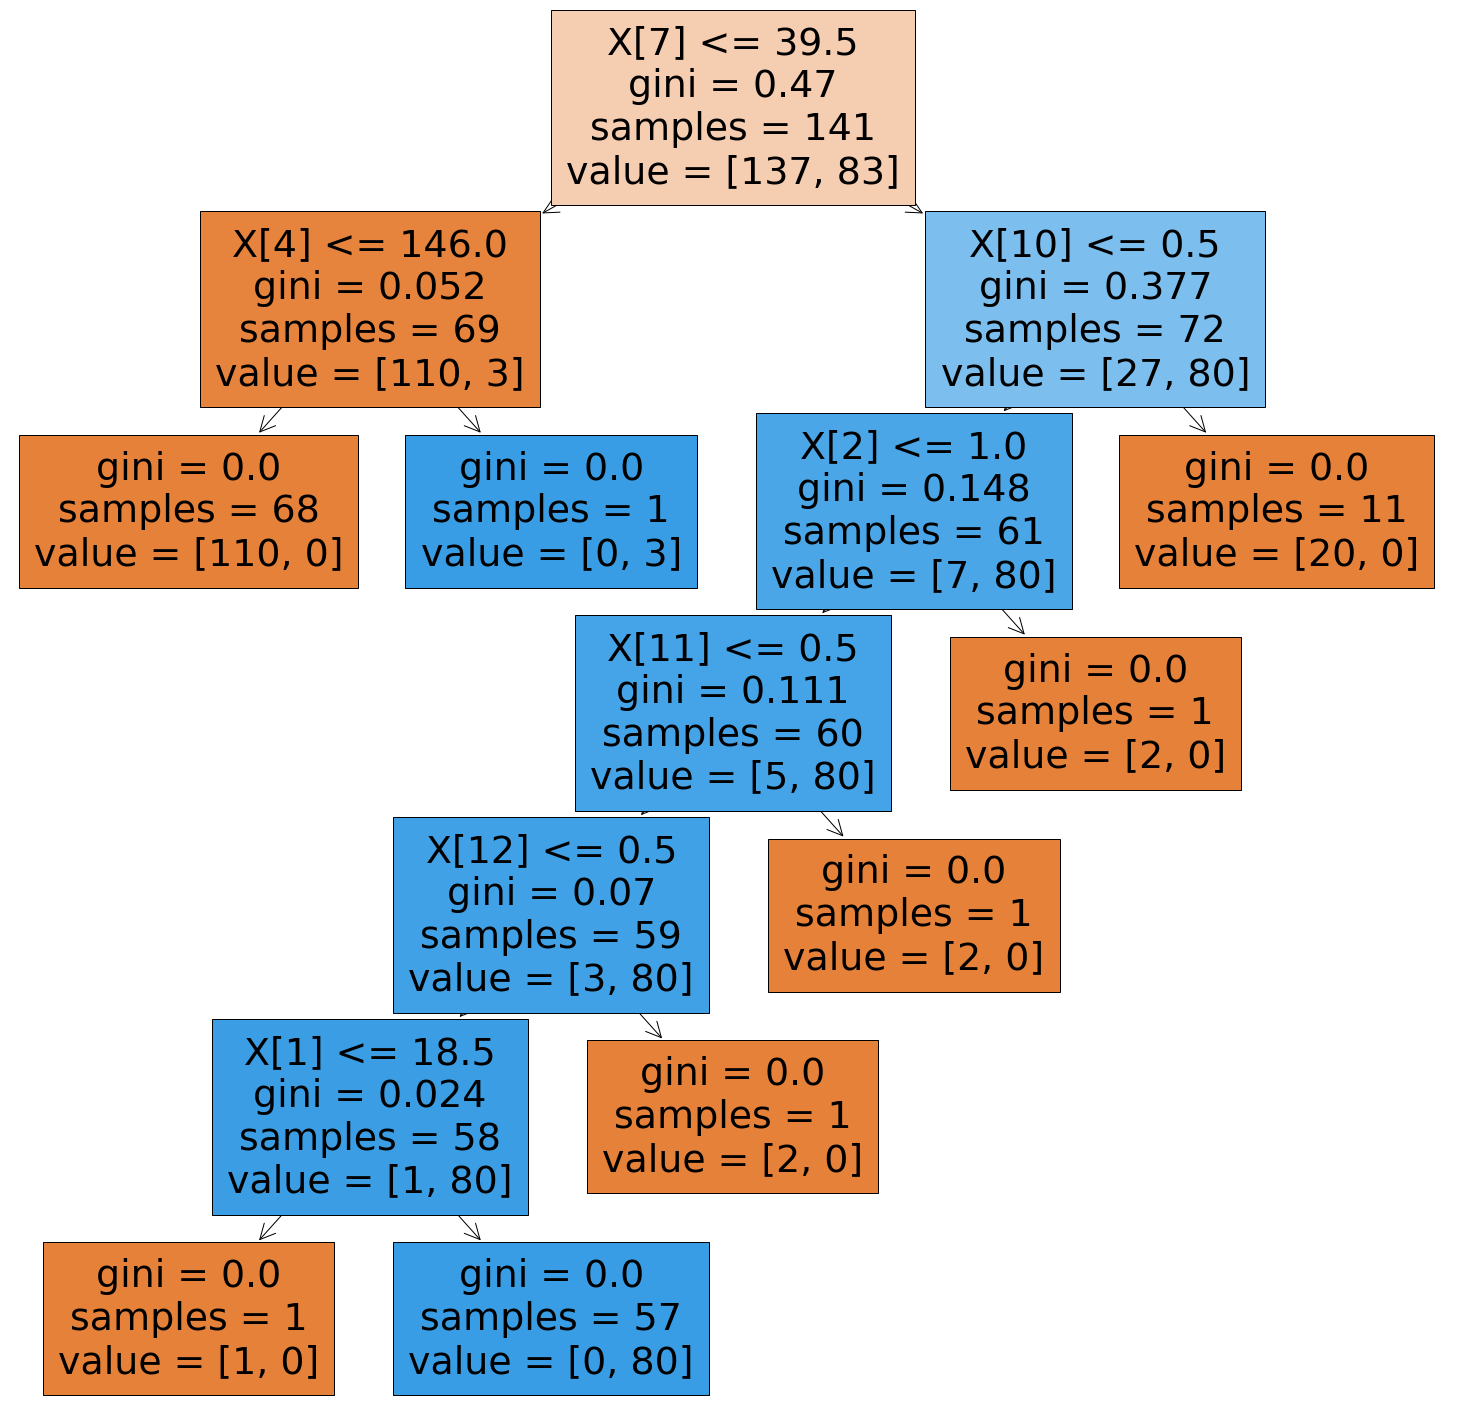

In [89]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[10],filled=True)

[Text(604.5, 1334.84, 'X[7] <= 39.5\ngini = 0.495\nsamples = 138\nvalue = [121, 99]'),
 Text(276.34285714285716, 1177.8, 'X[6] <= 12.513\ngini = 0.112\nsamples = 64\nvalue = [95, 6]'),
 Text(207.25714285714287, 1020.76, 'gini = 0.0\nsamples = 45\nvalue = [70, 0]'),
 Text(345.42857142857144, 1020.76, 'X[2] <= 0.5\ngini = 0.312\nsamples = 19\nvalue = [25, 6]'),
 Text(276.34285714285716, 863.7199999999999, 'X[3] <= 1.05\ngini = 0.408\nsamples = 12\nvalue = [15, 6]'),
 Text(207.25714285714287, 706.68, 'X[5] <= 4.764\ngini = 0.245\nsamples = 3\nvalue = [1, 6]'),
 Text(138.17142857142858, 549.64, 'X[3] <= 0.8\ngini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(69.08571428571429, 392.5999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(207.25714285714287, 392.5999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(276.34285714285716, 549.64, 'gini = 0.0\nsamples = 1\nvalue = [0, 4]'),
 Text(345.42857142857144, 706.68, 'gini = 0.0\nsamples = 9\nvalue = [14, 0]'),
 Text(414

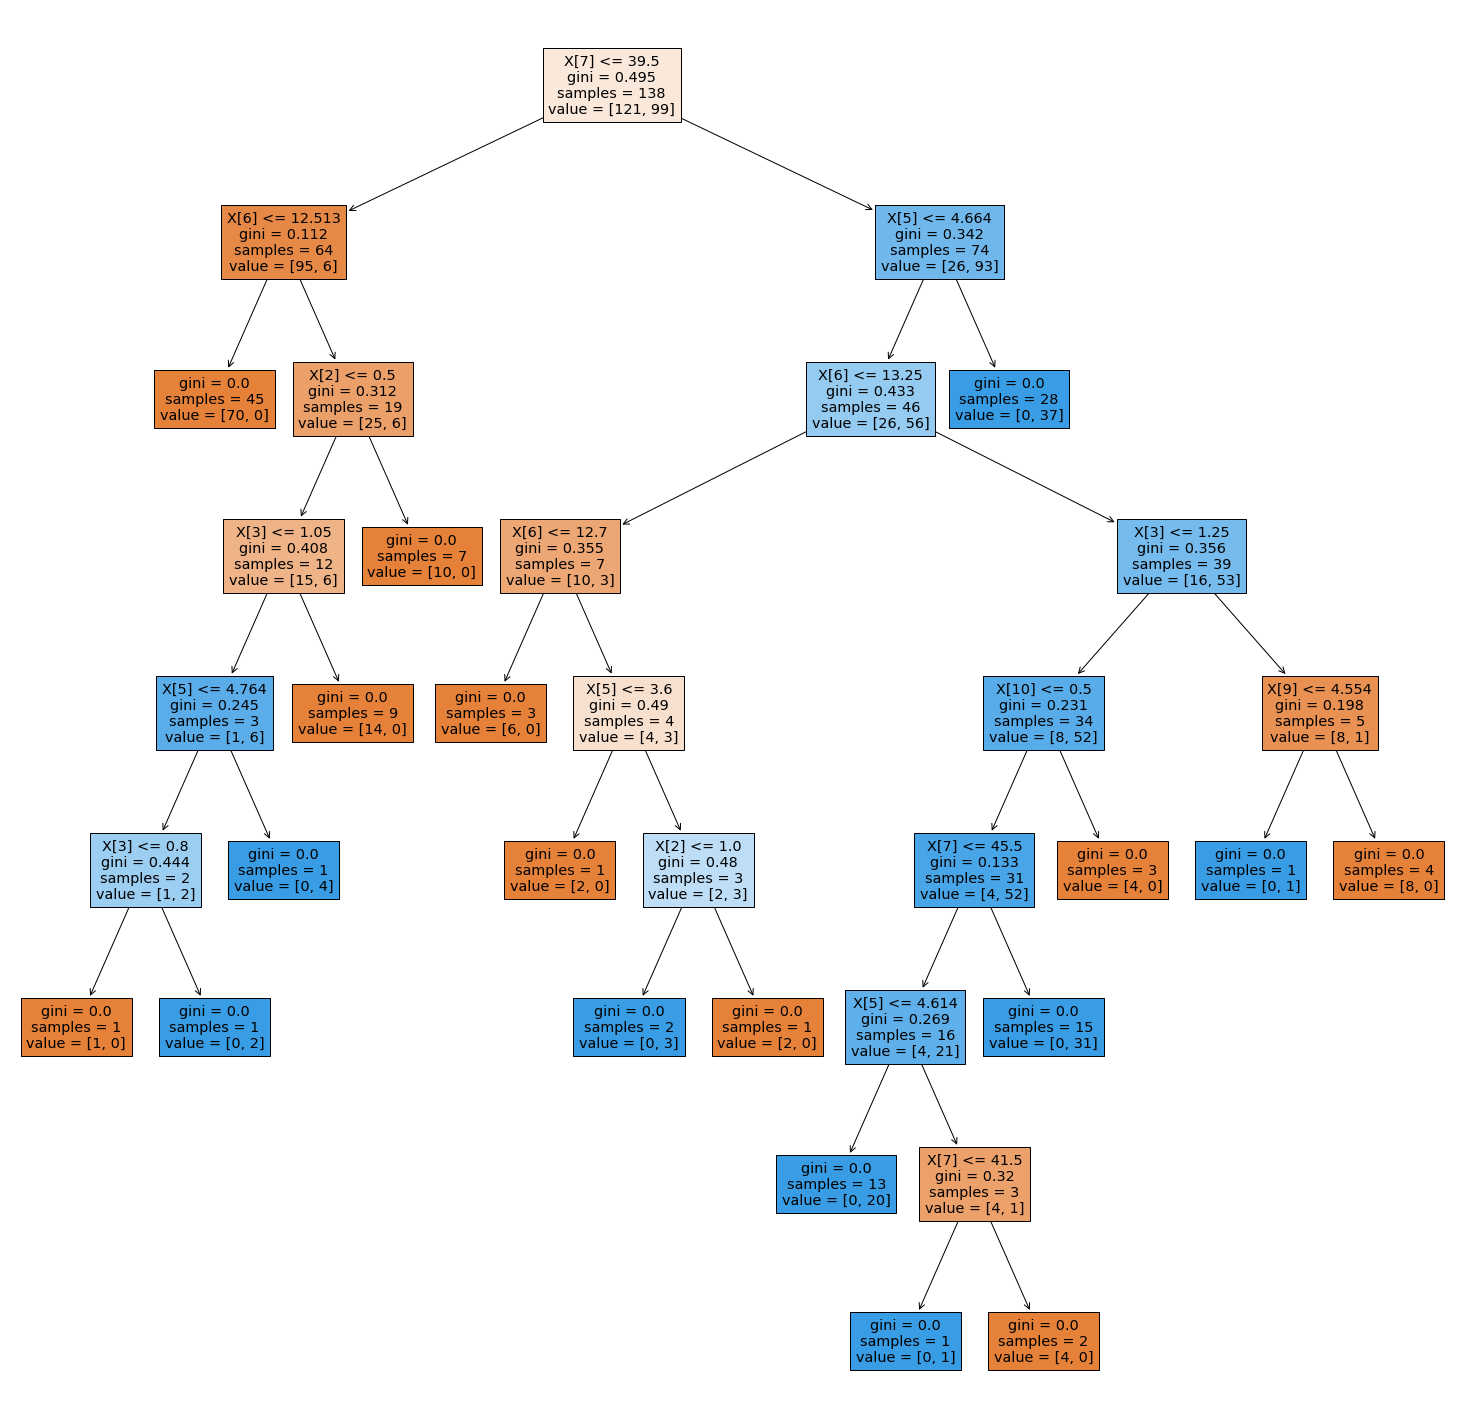

In [90]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[11],filled=True)

[Text(984.4714285714286, 1342.692, 'X[9] <= 4.754\ngini = 0.476\nsamples = 147\nvalue = [134, 86]'),
 Text(656.3142857142857, 1201.356, 'X[10] <= 0.5\ngini = 0.298\nsamples = 103\nvalue = [126, 28]'),
 Text(587.2285714285715, 1060.02, 'X[7] <= 39.442\ngini = 0.444\nsamples = 56\nvalue = [56, 28]'),
 Text(276.34285714285716, 918.684, 'X[7] <= 38.442\ngini = 0.101\nsamples = 36\nvalue = [53, 3]'),
 Text(207.25714285714287, 777.348, 'gini = 0.0\nsamples = 18\nvalue = [27, 0]'),
 Text(345.42857142857144, 777.348, 'X[0] <= 0.5\ngini = 0.185\nsamples = 18\nvalue = [26, 3]'),
 Text(276.34285714285716, 636.012, 'gini = 0.0\nsamples = 4\nvalue = [7, 0]'),
 Text(414.51428571428573, 636.012, 'X[5] <= 4.8\ngini = 0.236\nsamples = 14\nvalue = [19, 3]'),
 Text(276.34285714285716, 494.67600000000004, 'X[2] <= 0.5\ngini = 0.117\nsamples = 11\nvalue = [15, 1]'),
 Text(207.25714285714287, 353.3399999999999, 'X[5] <= 4.364\ngini = 0.18\nsamples = 7\nvalue = [9, 1]'),
 Text(138.17142857142858, 212.0040000

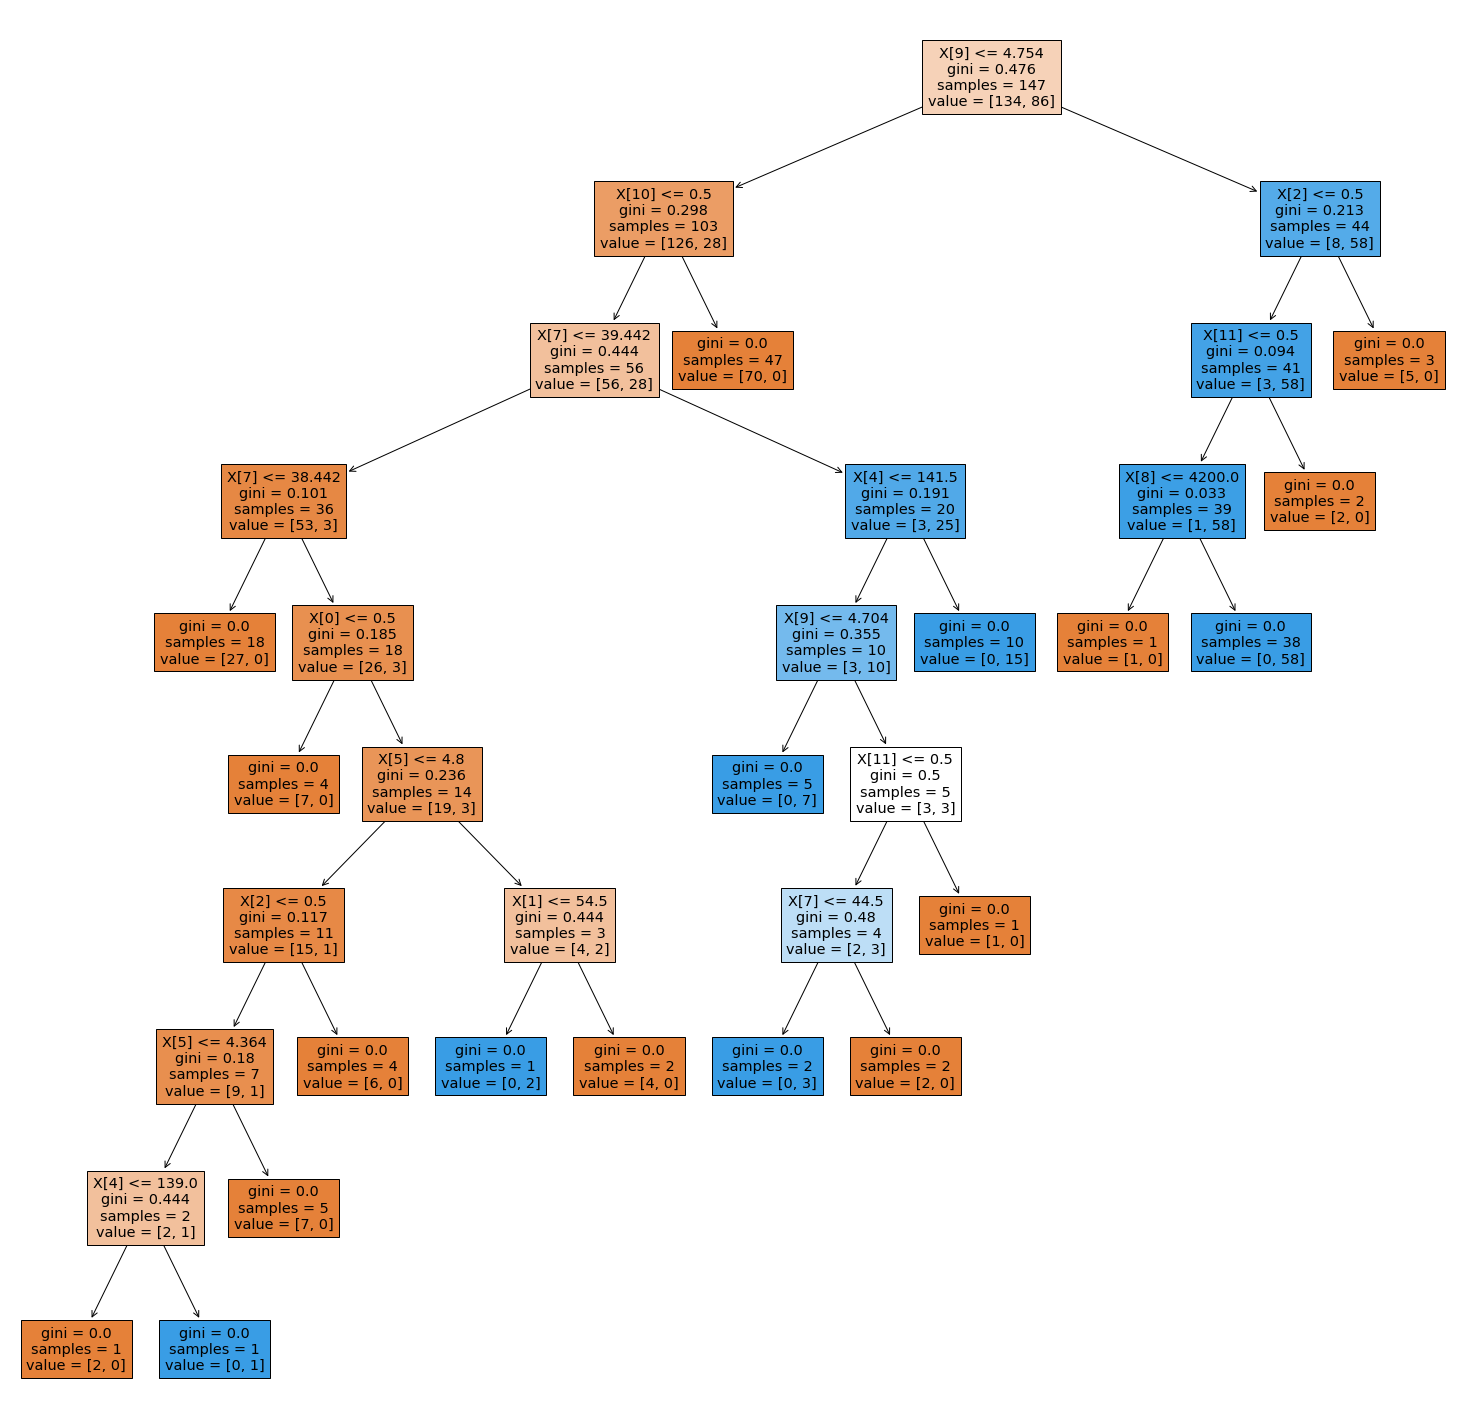

In [91]:
plt.figure(figsize=(26,26))
tree.plot_tree(rf.estimators_[12],filled=True)

In [92]:
for i in range(len(rf.estimators_)):
    print(tree.export_text(rf.estimators_[i]))

|--- feature_6 <= 13.05
|   |--- feature_8 <= 8353.06
|   |   |--- feature_9 <= 5.10
|   |   |   |--- class: 0.0
|   |   |--- feature_9 >  5.10
|   |   |   |--- class: 1.0
|   |--- feature_8 >  8353.06
|   |   |--- class: 0.0
|--- feature_6 >  13.05
|   |--- feature_3 <= 1.25
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_1 <= 60.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  60.50
|   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_3 >  1.25
|   |   |--- feature_9 <= 5.35
|   |   |   |--- class: 0.0
|   |   |--- feature_9 >  5.35
|   |   |   |--- class: 1.0

|--- feature_6 <= 12.95
|   |--- feature_4 <= 146.00
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_7 <= 37.94
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_7 >  3

# Model Evaluation

In [93]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[28,  1],
       [ 2, 25]], dtype=int64)

In [94]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9457215836526183

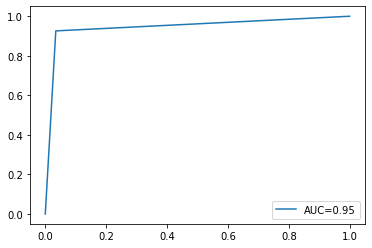

In [95]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend()
plt.show()